# EDA - Datos TCA


### Librerías

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
#from sklearn.preprocessing import category_encoders
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
#from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
sns.set_theme(style="darkgrid")
     

In [3]:
pd.set_option('display.max_columns', None)

### Conexión a SQL

In [4]:
host = "localhost"  # e.g., 'localhost' or IP address
port = "5432"       # default PostgreSQL port
database = "postgres"
user = "postgres"
password = "equipo3"


In [5]:
engine = create_engine(f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}")
#connection = engine.connect()
cubiertos = "cubiertos"  # Replace with the name of your table
detalles_vtas = "detalles_vtas" 

# CUBIERTOS

### Creación de dataframes

#### Tabla Cubiertos

Contiene detalles de transacciones en diferentes servicios en los hoteles

In [6]:
df_cub = pd.read_sql(f"SELECT * FROM cubiertos",engine)

df_cub

df_cub.head()

,caja_cve,turno_cve,fec_che,hora_alta,folio,status_cve,ID_Map_status,ID_Empresa,cubiertos,Ingresos,aa_Ingresos,ID_Map_turno,ID_Caja,id_date,HORA_MIN_SEG,fecha_hoy,ID_Map_tipo_bebyali,Total_Sin_Impuesto,moneda_cve,tipo_cheque,status,cortesias_cubiertos,cortesias_ingresos,no_pague_cubiertos,no_pague_ingresos,ID_platillo,ID_tipo_venta,ID_tipo_cheque,Tot_Neto,aa_Tot_Neto,CantCheque,aa_CantCheque
0,87,1,20190421,184100,7263,1,2,1,0,4,0,1,4,20190421,184100,2019-04-21 00:00:00.000,7,3.45,1,,,0,0,0,0,0,0,0,0,0,0,0
1,87,1,20190421,193500,7264,1,2,1,0,73,0,1,4,20190421,193500,2019-04-21 00:00:00.000,7,73.00,1,,,0,0,0,0,0,0,0,0,0,0,0
2,87,1,20190421,193600,7265,1,2,1,0,5,0,1,4,20190421,193600,2019-04-21 00:00:00.000,7,5.00,1,,,0,0,0,0,0,0,0,0,0,0,0
3,87,1,20190421,193600,7265,1,2,1,0,50,0,1,4,20190421,193600,2019-04-21 00:00:00.000,7,50.00,1,,,0,0,0,0,0,0,0,0,0,0,0
4,87,1,20190421,195100,7266,1,2,1,0,24,0,1,4,20190421,195100,2019-04-21 00:00:00.000,7,24.00,1,,,0,0,0,0,0,0,0,0,0,0,0


In [7]:
df_cub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400194 entries, 0 to 1400193
Data columns (total 32 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   caja_cve             1400194 non-null  int64  
 1   turno_cve            1400194 non-null  int64  
 2   fec_che              1400194 non-null  int64  
 3   hora_alta            1400194 non-null  int64  
 4   folio                1400194 non-null  object 
 5   status_cve           1400194 non-null  int64  
 6   ID_Map_status        1400194 non-null  int64  
 7   ID_Empresa           1400194 non-null  int64  
 8   cubiertos            1400194 non-null  int64  
 9   Ingresos             1400194 non-null  int64  
 10  aa_Ingresos          1400194 non-null  int64  
 11  ID_Map_turno         1400194 non-null  int64  
 12  ID_Caja              1400194 non-null  int64  
 13  id_date              1400194 non-null  int64  
 14  HORA_MIN_SEG         1400194 non-null  int64  
 15

### Manejar valores 0 o vacíos


En la visualización del dataframe observamos que tenemos muchas columnas con valores 0 o vacíos.

Tabla cubiertos

In [20]:
# Proporción de 0 en las columnas.
(df_cub == 0).mean()

caja_cve               0.000000
turno_cve              0.000000
fec_che                0.000000
hora_alta              0.000077
folio                  0.000000
status_cve             0.000000
ID_Map_status          0.000000
ID_Empresa             0.000000
cubiertos              0.983978
Ingresos               0.699984
aa_Ingresos            0.701613
ID_Map_turno           0.000000
ID_Caja                0.000000
id_date                0.000000
HORA_MIN_SEG           0.000077
fecha_hoy              0.000000
ID_Map_tipo_bebyali    0.000000
Total_Sin_Impuesto     0.664188
moneda_cve             0.000000
tipo_cheque            0.000000
status                 0.000000
cortesias_cubiertos    0.997318
cortesias_ingresos     0.990416
no_pague_cubiertos     0.976728
no_pague_ingresos      0.923935
ID_platillo            0.874957
ID_tipo_venta          1.000000
ID_tipo_cheque         0.707556
Tot_Neto               0.863847
aa_Tot_Neto            0.864338
CantCheque             0.834487
aa_CantC

In [21]:
# Reemplazar espacios vacíos con valores nulos.
df_cub = df_cub.replace(r"^\s*$", np.nan, regex=True)

df_cub.isnull().sum()

caja_cve                    0
turno_cve                   0
fec_che                     0
hora_alta                   0
folio                       0
status_cve                  0
ID_Map_status               0
ID_Empresa                  0
cubiertos                   0
Ingresos                    0
aa_Ingresos                 0
ID_Map_turno                0
ID_Caja                     0
id_date                     0
HORA_MIN_SEG                0
fecha_hoy                   0
ID_Map_tipo_bebyali         0
Total_Sin_Impuesto          0
moneda_cve                  0
tipo_cheque            990716
status                 762618
cortesias_cubiertos         0
cortesias_ingresos          0
no_pague_cubiertos          0
no_pague_ingresos           0
ID_platillo                 0
ID_tipo_venta               0
ID_tipo_cheque              0
Tot_Neto                    0
aa_Tot_Neto                 0
CantCheque                  0
aa_CantCheque               0
dtype: int64

In [22]:
# Eliminamos columnas con el >=90% de los datos con 0

threshold_zero = 0.9

df_cub = df_cub.loc[:, (df_cub == 0).mean() < threshold_zero]
(df_cub == 0).mean()

caja_cve               0.000000
turno_cve              0.000000
fec_che                0.000000
hora_alta              0.000077
folio                  0.000000
status_cve             0.000000
ID_Map_status          0.000000
ID_Empresa             0.000000
Ingresos               0.699984
aa_Ingresos            0.701613
ID_Map_turno           0.000000
ID_Caja                0.000000
id_date                0.000000
HORA_MIN_SEG           0.000077
fecha_hoy              0.000000
ID_Map_tipo_bebyali    0.000000
Total_Sin_Impuesto     0.664188
moneda_cve             0.000000
tipo_cheque            0.000000
status                 0.000000
ID_platillo            0.874957
ID_tipo_cheque         0.707556
Tot_Neto               0.863847
aa_Tot_Neto            0.864338
CantCheque             0.834487
aa_CantCheque          0.835210
dtype: float64

In [23]:
# Eliminamos los datos con 50% de valores nulos.

threshold_null = len(df_cub) * 0.5

df_cub = df_cub.dropna(axis=1, thresh=threshold_null)

df_cub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400194 entries, 0 to 1400193
Data columns (total 24 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   caja_cve             1400194 non-null  int64  
 1   turno_cve            1400194 non-null  int64  
 2   fec_che              1400194 non-null  int64  
 3   hora_alta            1400194 non-null  int64  
 4   folio                1400194 non-null  object 
 5   status_cve           1400194 non-null  int64  
 6   ID_Map_status        1400194 non-null  int64  
 7   ID_Empresa           1400194 non-null  int64  
 8   Ingresos             1400194 non-null  int64  
 9   aa_Ingresos          1400194 non-null  int64  
 10  ID_Map_turno         1400194 non-null  int64  
 11  ID_Caja              1400194 non-null  int64  
 12  id_date              1400194 non-null  int64  
 13  HORA_MIN_SEG         1400194 non-null  int64  
 14  fecha_hoy            1400194 non-null  object 
 15

In [31]:
df_cub = df_cub.drop(columns=['fec_che', 'hora_alta','HORA_MIN_SEG','fecha_hoy'])


df_cub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400194 entries, 0 to 1400193
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   caja_cve             1400194 non-null  int64  
 1   turno_cve            1400194 non-null  int64  
 2   folio                1400194 non-null  object 
 3   status_cve           1400194 non-null  int64  
 4   ID_Map_status        1400194 non-null  int64  
 5   ID_Empresa           1400194 non-null  int64  
 6   Ingresos             1400194 non-null  int64  
 7   aa_Ingresos          1400194 non-null  int64  
 8   ID_Map_turno         1400194 non-null  int64  
 9   ID_Caja              1400194 non-null  int64  
 10  id_date              1400194 non-null  int64  
 11  ID_Map_tipo_bebyali  1400194 non-null  int64  
 12  Total_Sin_Impuesto   1400194 non-null  float64
 13  moneda_cve           1400194 non-null  int64  
 14  ID_platillo          1400194 non-null  int64  
 15

In [36]:
df_cub.describe()

,caja_cve,turno_cve,status_cve,ID_Map_status,ID_Empresa,Ingresos,aa_Ingresos,ID_Map_turno,ID_Caja,id_date,ID_Map_tipo_bebyali,Total_Sin_Impuesto,moneda_cve,ID_platillo,ID_tipo_cheque,Tot_Neto,aa_Tot_Neto,CantCheque,aa_CantCheque
count,1.400194e+06,1.400194e+06,1.400194e+06,1.400194e+06,1400194.0,1.400194e+06,1.400194e+06,1.400194e+06,1.400194e+06,1.400194e+06,1.400194e+06,1.400194e+06,1400194.0,1.400194e+06,1.400194e+06,1.400194e+06,1.400194e+06,1.400194e+06,1.400194e+06
mean,7.308646e+01,1.110429e+00,1.013672e+00,2.013672e+00,1.0,2.337573e+01,2.331321e+01,1.110429e+00,6.093229e+00,2.019764e+07,4.416878e+00,2.052751e+01,1.5,2.594818e+01,7.521915e-01,2.046209e+01,2.040669e+01,1.655128e-01,1.647900e-01
std,3.243949e+01,3.398413e-01,1.161269e-01,1.161269e-01,0.0,7.175612e+02,7.174646e+02,3.398413e-01,2.756230e+00,6.283657e+03,2.885200e+00,6.186313e+02,0.5,9.895861e+01,1.331246e+00,6.839590e+02,6.839253e+02,3.716428e-01,3.709911e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.0,-1.237760e+05,-1.237760e+05,1.000000e+00,2.000000e+00,2.019021e+07,1.000000e+00,-1.067040e+05,1.0,0.000000e+00,0.000000e+00,-1.778400e+05,-1.778400e+05,0.000000e+00,0.000000e+00
25%,8.700000e+01,1.000000e+00,1.000000e+00,2.000000e+00,1.0,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,2.019081e+07,1.000000e+00,0.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.800000e+01,1.000000e+00,1.000000e+00,2.000000e+00,1.0,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,2.020030e+07,7.000000e+00,0.000000e+00,1.5,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.900000e+01,1.000000e+00,1.000000e+00,2.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00,2.020081e+07,7.000000e+00,1.606842e+00,2.0,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,9.200000e+01,3.000000e+00,2.000000e+00,3.000000e+00,1.0,2.644800e+05,2.644800e+05,3.000000e+00,1.400000e+01,2.021033e+07,7.000000e+00,2.280000e+05,2.0,9.830000e+02,4.000000e+00,2.280000e+05,2.280000e+05,1.000000e+00,1.000000e+00


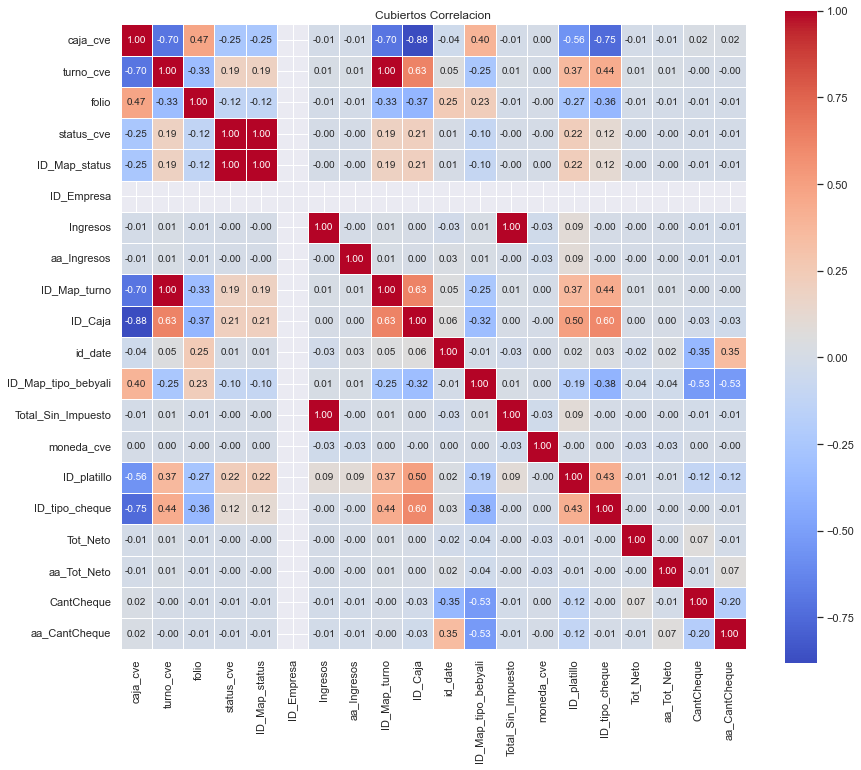

In [40]:
corr_cub = df_cub.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_cub, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Cubiertos Correlacion')
plt.show()

# DETALLES VTAS

#### Tabla Detalles Ventas

Contiene detalles de ventas de platillos.

In [8]:
df_dv = pd.read_sql(f"SELECT * FROM {detalles_vtas}", engine)

df_dv.head()

,id_detalle_vta,fecha_hoy,caja_cve,turno_cve,id_status,fec_com,hora_alta,folio,mesero,id_operador,platillo_cve,cantidad,aa_cantidad,cantidad_ali,aa_cantidad_ali,cantidad_beb,aa_cantidad_beb,cantidad_che_ali,aa_cantidad_che_ali,cantidad_che_beb,aa_cantidad_che_beb,importe,aa_importe,importe_ali,aa_importe_ali,importe_beb,aa_importe_beb,monto_total,aa_monto_total,id_map_turno,id_caja,id_platillo,tipo,id_tipo_mvto,id_date,hora_min_seg,id_date_sda,hora_min_seg_sda,domingo,lunes,martes,miercoles,jueves,viernes,sabado,id_empresa,id_map_tipo_bebyali,impto,aa_impto,total_sin_impuestos,aa_total_s_impto,moneda_cve,id_tipo_venta,id_map_status,id_tipo_cheque
0,223675,2018-09-26 00:00:00.000,1,1,1,20180926,92400,12615,AL0,329,DES026,1,0,1,0,0,0,1,0,0,0,5.118535,0,5.118535,0,0,0,5.9375,0,1,3,2460,A,1,20180926,92400,20180926,92400,0,0,0,1,0,0,0,3,1,1,0,5.118750,0,2,0,2,1
1,223676,2018-09-26 00:00:00.000,1,1,1,20180926,92400,12615,AL0,329,POS005,2,0,2,0,0,0,1,0,0,0,7.543103,0,7.543103,0,0,0,8.7500,0,1,3,747,A,1,20180926,92400,20180926,92400,0,0,0,1,0,0,0,3,1,1,0,7.543125,0,2,0,2,1
2,223677,2018-09-26 00:00:00.000,1,1,1,20180926,102900,12624,AL0,329,DES002,3,0,3,0,0,0,1,0,0,0,23.437500,0,23.437500,0,0,0,27.1875,0,1,3,710,A,1,20180926,102900,20180926,102900,0,0,0,1,0,0,0,3,1,1,0,23.437500,0,2,0,2,2
3,223678,2018-09-26 00:00:00.000,1,1,1,20180926,102900,12624,AL0,329,DES027,1,0,1,0,0,0,1,0,0,0,5.118535,0,5.118535,0,0,0,5.9375,0,1,3,429,A,1,20180926,102900,20180926,102900,0,0,0,1,0,0,0,3,1,1,0,5.118750,0,2,0,2,2
4,223679,2018-09-26 00:00:00.000,1,1,2,20180926,102900,12624,AL0,329,DSCALI,0,0,0,0,0,0,1,0,0,0,-5.711207,0,-5.711207,0,0,0,0.0000,0,1,3,480,A,1,20180926,102900,20180926,102900,0,0,0,1,0,0,0,3,1,1,0,-5.711250,0,2,0,2,2


In [9]:
df_dv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672428 entries, 0 to 1672427
Data columns (total 55 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   id_detalle_vta       1672428 non-null  int64  
 1   fecha_hoy            1672428 non-null  object 
 2   caja_cve             1672428 non-null  int64  
 3   turno_cve            1672428 non-null  int64  
 4   id_status            1672428 non-null  int64  
 5   fec_com              1672428 non-null  int64  
 6   hora_alta            1672428 non-null  int64  
 7   folio                1672428 non-null  object 
 8   mesero               1672428 non-null  object 
 9   id_operador          1672428 non-null  int64  
 10  platillo_cve         1672428 non-null  object 
 11  cantidad             1672428 non-null  int64  
 12  aa_cantidad          1672428 non-null  int64  
 13  cantidad_ali         1672428 non-null  int64  
 14  aa_cantidad_ali      1672428 non-null  int64  
 15

In [32]:
df_dv = df_dv.drop(columns=['fecha_hoy','fec_com','platillo_cve','hora_min_seg','id_date_sda','hora_min_seg_sda'])

df_dv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672428 entries, 0 to 1672427
Data columns (total 38 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   id_detalle_vta       1672428 non-null  int64  
 1   caja_cve             1672428 non-null  int64  
 2   turno_cve            1672428 non-null  int64  
 3   id_status            1672428 non-null  int64  
 4   hora_alta            1672428 non-null  int64  
 5   folio                1672428 non-null  object 
 6   mesero               1672428 non-null  object 
 7   id_operador          1672428 non-null  int64  
 8   cantidad             1672428 non-null  int64  
 9   cantidad_ali         1672428 non-null  int64  
 10  cantidad_beb         1672428 non-null  int64  
 11  cantidad_che_ali     1672428 non-null  int64  
 12  cantidad_che_beb     1672428 non-null  int64  
 13  importe              1672428 non-null  float64
 14  importe_ali          1672428 non-null  float64
 15

In [37]:
df_dv.describe()

,id_detalle_vta,caja_cve,turno_cve,id_status,hora_alta,id_operador,cantidad,cantidad_ali,cantidad_beb,cantidad_che_ali,cantidad_che_beb,importe,importe_ali,importe_beb,monto_total,id_map_turno,id_caja,id_platillo,id_tipo_mvto,id_date,domingo,lunes,martes,miercoles,jueves,viernes,sabado,id_empresa,id_map_tipo_bebyali,impto,total_sin_impuestos,moneda_cve,id_tipo_venta,id_map_status,id_tipo_cheque
count,1.672428e+06,1.672428e+06,1.672428e+06,1.672428e+06,1.672428e+06,1.672428e+06,1.672428e+06,1.672428e+06,1.672428e+06,1.672428e+06,1.672428e+06,1.672428e+06,1.672428e+06,1.672428e+06,1.672428e+06,1.672428e+06,1.672428e+06,1.672428e+06,1.672428e+06,1.672428e+06,1.672428e+06,1.672428e+06,1.672428e+06,1.672428e+06,1.672428e+06,1.672428e+06,1.672428e+06,1.672428e+06,1.672428e+06,1.672428e+06,1.672428e+06,1672428.0,1.672428e+06,1.672428e+06,1.672428e+06
mean,8.362135e+05,3.654930e+00,2.001356e+00,1.101872e+00,1.569148e+05,7.225069e+02,2.262949e+00,1.231026e+00,7.297259e-01,5.899459e-01,3.791422e-01,1.442017e+02,9.373989e+01,2.967192e+01,9.064463e+01,2.001356e+00,6.028952e+00,1.017275e+03,6.517124e-01,2.019319e+07,1.698333e-01,1.081254e-01,1.084579e-01,1.169581e-01,1.264927e-01,1.568223e-01,2.133102e-01,3.588496e+00,2.261038e+00,1.168863e+01,1.442015e+02,1.5,2.397066e-01,2.026549e+00,1.493172e+00
std,4.827885e+05,4.899333e+00,8.008545e-01,3.503153e-01,4.538669e+04,5.001388e+02,1.509410e+01,1.047300e+01,7.759688e+00,4.918434e-01,4.851737e-01,2.128171e+03,1.883561e+03,6.666758e+02,6.886989e+02,8.008545e-01,5.024057e+00,7.597617e+02,5.373546e-01,9.009901e+03,3.754864e-01,3.105389e-01,3.109579e-01,3.213704e-01,3.324040e-01,3.636333e-01,4.096451e-01,1.438652e+00,1.521992e+00,6.971175e+00,2.128171e+03,0.5,4.269045e-01,1.607625e-01,9.768277e-01
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.990000e+02,-9.990000e+02,-9.560000e+02,0.000000e+00,0.000000e+00,-3.759160e+05,-3.759160e+05,-1.236640e+05,-6.958000e+03,1.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,2.018042e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,-3.759160e+05,1.0,0.000000e+00,2.000000e+00,1.000000e+00
25%,4.181068e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.202000e+05,3.290000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.017333e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,3.970000e+02,0.000000e+00,2.019022e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,5.017460e+00,1.0,0.000000e+00,2.000000e+00,1.000000e+00
50%,8.362135e+05,1.000000e+00,2.000000e+00,1.000000e+00,1.618000e+05,3.830000e+02,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.879310e+01,1.803492e+00,0.000000e+00,2.228033e+01,2.000000e+00,3.000000e+00,7.180000e+02,1.000000e+00,2.019081e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,1.000000e+00,1.600000e+01,3.879000e+01,1.5,0.000000e+00,2.000000e+00,1.000000e+00
75%,1.254320e+06,5.000000e+00,3.000000e+00,1.000000e+00,1.950000e+05,1.156000e+03,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.077586e+02,7.327586e+01,9.000000e+00,8.800000e+01,3.000000e+00,7.000000e+00,1.696000e+03,1.000000e+00,2.020042e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,4.000000e+00,1.600000e+01,1.077600e+02,2.0,0.000000e+00,2.000000e+00,1.000000e+00
max,1.672427e+06,9.200000e+01,4.000000e+00,4.000000e+00,2.359000e+05,2.011000e+03,9.990000e+02,9.990000e+02,9.560000e+02,1.000000e+00,1.000000e+00,6.864150e+05,6.864150e+05,2.175570e+05,1.398600e+05,4.000000e+00,1.800000e+01,2.514000e+03,2.000000e+00,2.021052e+07,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00,6.000000e+00,1.600000e+01,6.864150e+05,2.0,1.000000e+00,3.000000e+0

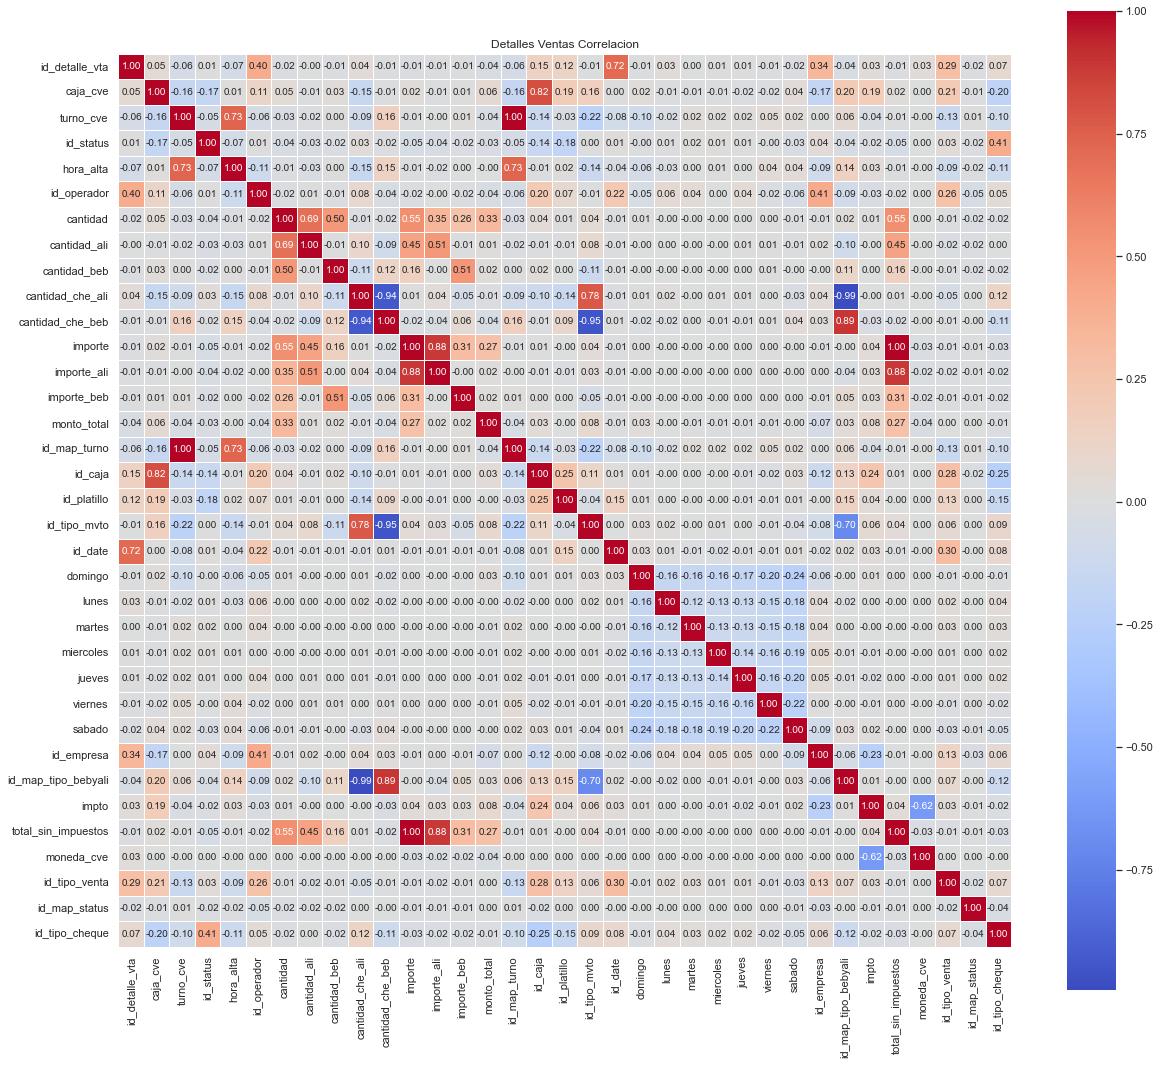

In [46]:
corr_dv = df_dv.corr(numeric_only=True)
plt.figure(figsize=(20, 18))
sns.heatmap(corr_dv, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Detalles Ventas Correlacion')
plt.show()

# RESERVACIONES

#### Tabla Reservaciones

Contiene detalles de diferentes reservaciones en un periodo de tiempo.

In [151]:
df_resv = pd.read_sql(f"SELECT * FROM reservaciones", engine, index_col='id_reserva')

df_resv.head()

,fecha_hoy,h_res_fec,h_res_fec_ok,h_res_fec_okt,h_num_per,aa_h_num_per,h_num_adu,aa_h_num_adu,h_num_men,aa_h_num_men,h_num_noc,aa_h_num_noc,h_tot_hab,aa_h_tot_hab,id_programa,id_paquete,id_segmento_comp,id_agencia,id_empresa,id_tipo_habitacion,id_canal,h_fec_lld,h_fec_lld_ok,h_fec_lld_okt,h_fec_reg_ok,h_fec_reg_okt,h_fec_sda_ok,h_fec_sda_okt,id_pais_origen,cliente_disp,aa_cliente_disp,reservacion,aa_reservacion,id_estatus_reservaciones,h_edo,h_nom,h_tfa_total,aa_h_tfa_total,moneda_cve,h_ult_cam_fec_ok,h_ult_cam_fec_okt
id_reserva,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2019-08-16 00:00:00.000,20190816,2019-08-16,2019-08-16 00:00:00.000,2,0,2,0,0,0,3,0,1,0,1,1,14,112,1,25,10,20191107.0,2019-11-07,2019-11-07 00:00:00.000,2019-08-16,2019-08-16 00:00:00.000,2019-11-10,2019-11-10 00:00:00.000,157,2,0,1,0,9,EMX,"QUIROZ, SOFIA",2659.98,0.0,1,2019-11-10,2019-11-10 00:00:00.000
1,2019-10-22 00:00:00.000,20191022,2019-10-22,2019-10-22 00:00:00.000,4,0,4,0,0,0,4,0,1,0,1,2,14,112,1,25,10,20191201.0,2019-12-01,2019-12-01 00:00:00.000,2019-10-22,2019-10-22 00:00:00.000,2019-12-05,2019-12-05 00:00:00.000,157,4,0,1,0,9,EGT,"JIMENEZ, VALENTIN",1764.00,0.0,1,2019-12-05,2019-12-05 00:00:00.000
2,2019-10-28 00:00:00.000,20191028,2019-10-28,2019-10-28 00:00:00.000,2,0,2,0,0,0,4,0,1,0,1,1,14,112,1,23,10,20191201.0,2019-12-01,2019-12-01 00:00:00.000,2019-10-28,2019-10-28 00:00:00.000,2019-12-05,2019-12-05 00:00:00.000,157,2,0,1,0,9,EMC,"GALLEGOS, JORGE ROBERTO",2660.04,0.0,1,2019-12-05,2019-12-05 00:00:00.000
3,2019-10-28 00:00:00.000,20191028,2019-10-28,2019-10-28 00:00:00.000,4,0,3,0,0,0,3,0,1,0,1,2,14,112,1,24,10,20191208.0,2019-12-08,2019-12-08 00:00:00.000,2019-10-28,2019-10-28 00:00:00.000,2019-12-11,2019-12-11 00:00:00.000,157,3,0,1,0,9,EGT,"PEREA, VICTOR HUGO",1995.03,0.0,1,2019-12-11,2019-12-11 00:00:00.000
4,2019-10-28 00:00:00.000,20191028,2019-10-28,2019-10-28 00:00:00.000,2,0,2,0,0,0,4,0,1,0,1,1,5,14,1,4,13,20191208.0,2019-12-08,2019-12-08 00:00:00.000,2019-12-08,2019-12-08 00:00:00.000,2019-12-12,2019-12-12 00:00:00.000,157,2,0,1,0,9,EMX,"TREJO GALVAN, RAMON",13369.92,0.0,1,2019-12-12,2019-12-12 00:00:00.000


In [152]:
df_resv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203002 entries, 0 to 203001
Data columns (total 41 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   fecha_hoy                 203002 non-null  object 
 1   h_res_fec                 203002 non-null  int64  
 2   h_res_fec_ok              203002 non-null  object 
 3   h_res_fec_okt             203002 non-null  object 
 4   h_num_per                 203002 non-null  int64  
 5   aa_h_num_per              203002 non-null  int64  
 6   h_num_adu                 203002 non-null  int64  
 7   aa_h_num_adu              203002 non-null  int64  
 8   h_num_men                 203002 non-null  int64  
 9   aa_h_num_men              203002 non-null  int64  
 10  h_num_noc                 203002 non-null  int64  
 11  aa_h_num_noc              203002 non-null  int64  
 12  h_tot_hab                 203002 non-null  int64  
 13  aa_h_tot_hab              203002 non-null  int64 

In [153]:
df_resv['id_estatus_reservaciones'].unique()

array([9, 2, 5, 3, 4, 1, 7, 8], dtype=int64)

In [154]:
df_resv['reservacion'].unique()

array([1, 0], dtype=int64)

In [155]:
df_resv.loc[df_resv['reservacion'] == 0]

,fecha_hoy,h_res_fec,h_res_fec_ok,h_res_fec_okt,h_num_per,aa_h_num_per,h_num_adu,aa_h_num_adu,h_num_men,aa_h_num_men,h_num_noc,aa_h_num_noc,h_tot_hab,aa_h_tot_hab,id_programa,id_paquete,id_segmento_comp,id_agencia,id_empresa,id_tipo_habitacion,id_canal,h_fec_lld,h_fec_lld_ok,h_fec_lld_okt,h_fec_reg_ok,h_fec_reg_okt,h_fec_sda_ok,h_fec_sda_okt,id_pais_origen,cliente_disp,aa_cliente_disp,reservacion,aa_reservacion,id_estatus_reservaciones,h_edo,h_nom,h_tfa_total,aa_h_tfa_total,moneda_cve,h_ult_cam_fec_ok,h_ult_cam_fec_okt
id_reserva,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
102199,2020-08-16 00:00:00.000,20190816,2019-08-16,2019-08-16 00:00:00.000,0,2,0,2,0,0,0,3,0,1,1,1,14,112,1,25,10,20191107.0,2019-11-07,2019-11-07 00:00:00.000,2019-08-16,2019-08-16 00:00:00.000,2019-11-10,2019-11-10 00:00:00.000,157,0,2,0,1,9,EMX,"QUIROZ, SOFIA",0.0,2659.98,1,2019-11-10,2019-11-10 00:00:00.000
102200,2020-10-22 00:00:00.000,20191022,2019-10-22,2019-10-22 00:00:00.000,0,4,0,4,0,0,0,4,0,1,1,2,14,112,1,25,10,20191201.0,2019-12-01,2019-12-01 00:00:00.000,2019-10-22,2019-10-22 00:00:00.000,2019-12-05,2019-12-05 00:00:00.000,157,0,4,0,1,9,EGT,"JIMENEZ, VALENTIN",0.0,1764.00,1,2019-12-05,2019-12-05 00:00:00.000
102201,2020-10-28 00:00:00.000,20191028,2019-10-28,2019-10-28 00:00:00.000,0,2,0,2,0,0,0,4,0,1,1,1,14,112,1,23,10,20191201.0,2019-12-01,2019-12-01 00:00:00.000,2019-10-28,2019-10-28 00:00:00.000,2019-12-05,2019-12-05 00:00:00.000,157,0,2,0,1,9,EMC,"GALLEGOS, JORGE ROBERTO",0.0,2660.04,1,2019-12-05,2019-12-05 00:00:00.000
102202,2020-10-28 00:00:00.000,20191028,2019-10-28,2019-10-28 00:00:00.000,0,4,0,3,0,0,0,3,0,1,1,2,14,112,1,24,10,20191208.0,2019-12-08,2019-12-08 00:00:00.000,2019-10-28,2019-10-28 00:00:00.000,2019-12-11,2019-12-11 00:00:00.000,157,0,3,0,1,9,EGT,"PEREA, VICTOR HUGO",0.0,1995.03,1,2019-12-11,2019-12-11 00:00:00.000
102203,2020-10-28 00:00:00.000,20191028,2019-10-28,2019-10-28 00:00:00.000,0,2,0,2,0,0,0,4,0,1,1,1,5,14,1,4,13,20191208.0,2019-12-08,2019-12-08 00:00:00.000,2019-12-08,2019-12-08 00:00:00.000,2019-12-12,2019-12-12 00:00:00.000,157,0,2,0,1,9,EMX,"TREJO GALVAN, RAMON",0.0,13369.92,1,2019-12-12,2019-12-12 00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202997,2020-04-10 00:00:00.000,20190410,2019-04-10,2019-04-10 00:00:00.000,0,2,0,2,0,0,0,3,0,1,1,2,14,112,1,19,1,20190410.0,2019-04-10,2019-04-10 00:00:00.000,2019-04-10,2019-04-10 00:00:00.000,2019-04-10,2019-04-10 00:00:00.000,0,0,2,0,1,2,EMC,"VENEGAS, JOSE",0.0,2659.95,1,2019-04-10,2019-04-10 00:00:00.000
202998,2020-06-17 00:00:00.000,20190617,2019-06-17,2019-06-17 00:00:00.000,0,2,0,2,0,0,0,0,0,1,1,1,14,112,1,13,1,20190617.0,2019-06-17,2019-06-17 00:00:00.000,2019-06-17,2019-06-17 00:00:00.000,2019-06-17,2019-06-17 00:00:00.000,0,0,2,0,1,9,EGR,"MEJINEZ, ALFREDO",0.0,171.00,1,2019-06-17,2019-06-17 00:00:00.000
202999,2020-05-30 00:00:00.000,20190530,2019-05-30,2019-05-30 00:00:00.000,0,3,0,2,0,0,0,3,0,1,1,2,14,112,1,17,1,20190530.0,2019-05-30,2019-05-30 00:00:00.000,2019-05-30,2019-05-30 00:00:00.000,2019-06-02,2019-06-02 00:00:00.000,0,0,2,0,1,9,EMC,"VELAZQUEZ, JUAN JOSE",0.0,2659.98,1,2019-06-02,2019-06-02 00:00:00.000


In [156]:
reservaciones_por_estatus = df_resv.groupby(['id_estatus_reservaciones', 'reservacion']).size().unstack(fill_value=0)

# Renombrar columnas para mayor claridad
reservaciones_por_estatus.columns = ['No Reservaciones (0)', 'Sí Reservaciones (1)']

# Mostrar el resultado
print(reservaciones_por_estatus)



                          No Reservaciones (0)  Sí Reservaciones (1)
id_estatus_reservaciones                                            
1                                         8100                  9058
2                                        16561                 16740
3                                          927                   927
4                                          293                   293
5                                         9335                  9545
7                                            1                    23
8                                           63                    67
9                                        65523                 65546


In [157]:
df_resv.loc[df_resv['id_estatus_reservaciones'] == 8]

,fecha_hoy,h_res_fec,h_res_fec_ok,h_res_fec_okt,h_num_per,aa_h_num_per,h_num_adu,aa_h_num_adu,h_num_men,aa_h_num_men,h_num_noc,aa_h_num_noc,h_tot_hab,aa_h_tot_hab,id_programa,id_paquete,id_segmento_comp,id_agencia,id_empresa,id_tipo_habitacion,id_canal,h_fec_lld,h_fec_lld_ok,h_fec_lld_okt,h_fec_reg_ok,h_fec_reg_okt,h_fec_sda_ok,h_fec_sda_okt,id_pais_origen,cliente_disp,aa_cliente_disp,reservacion,aa_reservacion,id_estatus_reservaciones,h_edo,h_nom,h_tfa_total,aa_h_tfa_total,moneda_cve,h_ult_cam_fec_ok,h_ult_cam_fec_okt
id_reserva,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
28612,2020-03-03 00:00:00.000,20200303,2020-03-03,2020-03-03 00:00:00.000,1,0,1,0,0,0,3,0,1,0,1,1,17,27,1,24,1,20200712.0,2020-07-12,2020-07-12 00:00:00.000,2020-03-03,2020-03-03 00:00:00.000,2020-07-15,2020-07-15 00:00:00.000,157,1,0,1,0,8,EGT,"ANGUIANO, SARA",7437.00,0.00,1,2020-07-12,2020-07-12 00:00:00.000
28981,2020-01-15 00:00:00.000,20200115,2020-01-15,2020-01-15 00:00:00.000,3,0,3,0,0,0,7,0,1,0,1,1,14,112,1,23,10,20200711.0,2020-07-11,2020-07-11 00:00:00.000,2020-01-15,2020-01-15 00:00:00.000,2020-07-18,2020-07-18 00:00:00.000,157,3,0,1,0,8,EGT,"MARENTES, NORBERTO",9180.01,0.00,1,2020-07-11,2020-07-11 00:00:00.000
28982,2020-01-15 00:00:00.000,20200115,2020-01-15,2020-01-15 00:00:00.000,3,0,3,0,0,0,7,0,1,0,1,1,14,112,1,25,10,20200711.0,2020-07-11,2020-07-11 00:00:00.000,2020-01-15,2020-01-15 00:00:00.000,2020-07-18,2020-07-18 00:00:00.000,157,3,0,1,0,8,EGT,"MARENTES, NORBERTO",6100.01,0.00,1,2020-07-11,2020-07-11 00:00:00.000
29689,2020-03-18 00:00:00.000,20200318,2020-03-18,2020-03-18 00:00:00.000,1,0,1,0,0,0,3,0,1,0,1,1,13,33,1,4,4,20200711.0,2020-07-11,2020-07-11 00:00:00.000,2020-03-18,2020-03-18 00:00:00.000,2020-07-14,2020-07-14 00:00:00.000,157,1,0,1,0,8,EHG,"GARCIA, ADRIANA",6897.00,0.00,1,2020-07-12,2020-07-12 00:00:00.000
29695,2020-03-18 00:00:00.000,20200318,2020-03-18,2020-03-18 00:00:00.000,2,0,2,0,0,0,3,0,1,0,1,1,13,33,1,6,4,20200711.0,2020-07-11,2020-07-11 00:00:00.000,2020-03-18,2020-03-18 00:00:00.000,2020-07-14,2020-07-14 00:00:00.000,157,2,0,1,0,8,EHG,"VIDAL, EZEQUIEL",9894.00,0.00,1,2020-07-11,2020-07-11 00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154057,2021-01-24 00:00:00.000,20200124,2020-01-24,2020-01-24 00:00:00.000,0,2,0,2,0,0,0,7,0,1,1,1,14,112,1,23,10,20200711.0,2020-07-11,2020-07-11 00:00:00.000,2020-01-24,2020-01-24 00:00:00.000,2020-07-18,2020-07-18 00:00:00.000,157,0,2,0,1,8,EMC,"ALARCON, ELIZABETH",0.00,6129.97,1,2020-07-12,2020-07-12 00:00:00.000
154058,2021-01-24 00:00:00.000,20200124,2020-01-24,2020-01-24 00:00:00.000,0,1,0,1,0,0,0,7,0,1,1,1,14,112,1,25,10,20200711.0,2020-07-11,2020-07-11 00:00:00.000,2020-01-24,2020-01-24 00:00:00.000,2020-07-18,2020-07-18 00:00:00.000,157,0,1,0,1,8,EMC,"ALARCON, ELIZABETH",0.00,6129.97,1,2020-07-12,2020-07-12 00:00:00.000
154059,2021-01-24 00:00:00.000,20200124,2020-01-24,2020-01-24 00:00:00.000,0,2,0,2,0,0,0,7,0,1,1,1,14,112,1,27,10,20200711.0,2020-07-11,2020-07-11 00:00:00.000,2020-01-24,2020-01-24 00:00:00.000,2020-07-18,2020-07-18 00:00:00.000,157,0,2,0,1,8,EGR,"ALARCON, ELIZABETH",0.00,7024.99,1,2020-07-12,2020-07-12 00:00:00.000


## Limpieza de datos

Tabla detalles ventas

In [24]:
#Eliminamos columnas con 90% de 0
threshold_zero = 0.9

df_dv = df_dv.loc[:, (df_dv == 0).mean() < threshold_zero]
df_dv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672428 entries, 0 to 1672427
Data columns (total 44 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   id_detalle_vta       1672428 non-null  int64  
 1   fecha_hoy            1672428 non-null  object 
 2   caja_cve             1672428 non-null  int64  
 3   turno_cve            1672428 non-null  int64  
 4   id_status            1672428 non-null  int64  
 5   fec_com              1672428 non-null  int64  
 6   hora_alta            1672428 non-null  int64  
 7   folio                1672428 non-null  object 
 8   mesero               1672428 non-null  object 
 9   id_operador          1672428 non-null  int64  
 10  platillo_cve         1672428 non-null  object 
 11  cantidad             1672428 non-null  int64  
 12  cantidad_ali         1672428 non-null  int64  
 13  cantidad_beb         1672428 non-null  int64  
 14  cantidad_che_ali     1672428 non-null  int64  
 15

In [25]:
# Reemplazar espacios vacíos con valores nulos.
df_dv = df_dv.replace(r"^\s*$", np.nan, regex=True)

df_dv.isnull().sum()

id_detalle_vta          0
fecha_hoy               0
caja_cve                0
turno_cve               0
id_status               0
fec_com                 0
hora_alta               0
folio                   0
mesero                  0
id_operador             0
platillo_cve            0
cantidad                0
cantidad_ali            0
cantidad_beb            0
cantidad_che_ali        0
cantidad_che_beb        0
importe                 0
importe_ali             0
importe_beb             0
monto_total             0
id_map_turno            0
id_caja                 0
id_platillo             0
tipo                   12
id_tipo_mvto            0
id_date                 0
hora_min_seg            0
id_date_sda             0
hora_min_seg_sda        0
domingo                 0
lunes                   0
martes                  0
miercoles               0
jueves                  0
viernes                 0
sabado                  0
id_empresa              0
id_map_tipo_bebyali     0
impto       

Tabla reservaciones

In [158]:
# Proporción de 0 en las columnas
(df_resv == 0).mean()

fecha_hoy                   0.000000
h_res_fec                   0.000000
h_res_fec_ok                0.000000
h_res_fec_okt               0.000000
h_num_per                   0.496562
aa_h_num_per                0.503438
h_num_adu                   0.496562
aa_h_num_adu                0.503438
h_num_men                   0.977394
aa_h_num_men                0.977655
h_num_noc                   0.497562
aa_h_num_noc                0.504438
h_tot_hab                   0.497773
aa_h_tot_hab                0.504650
id_programa                 0.002424
id_paquete                  0.002424
id_segmento_comp            0.002847
id_agencia                  0.000000
id_empresa                  0.000000
id_tipo_habitacion          0.000049
id_canal                    0.031418
h_fec_lld                   0.000000
h_fec_lld_ok                0.000000
h_fec_lld_okt               0.000000
h_fec_reg_ok                0.000000
h_fec_reg_okt               0.000000
h_fec_sda_ok                0.000000
h

In [159]:
# Replace empty strings with NaN
df_resv = df_resv.replace(r"^\s*$", np.nan, regex=True)

# Count NaN values after replacing empty strings
df_resv.isnull().sum()

fecha_hoy                   0
h_res_fec                   0
h_res_fec_ok                0
h_res_fec_okt               0
h_num_per                   0
aa_h_num_per                0
h_num_adu                   0
aa_h_num_adu                0
h_num_men                   0
aa_h_num_men                0
h_num_noc                   0
aa_h_num_noc                0
h_tot_hab                   0
aa_h_tot_hab                0
id_programa                 0
id_paquete                  0
id_segmento_comp            0
id_agencia                  0
id_empresa                  0
id_tipo_habitacion          0
id_canal                    0
h_fec_lld                   2
h_fec_lld_ok                0
h_fec_lld_okt               0
h_fec_reg_ok                0
h_fec_reg_okt               0
h_fec_sda_ok                0
h_fec_sda_okt               0
id_pais_origen              0
cliente_disp                0
aa_cliente_disp             0
reservacion                 0
aa_reservacion              0
id_estatus

In [160]:
df_resv = df_resv.drop(columns=['h_res_fec_ok', 'h_res_fec_okt','aa_h_num_per','aa_h_num_adu',
                                'aa_h_num_men','aa_h_num_noc','aa_h_tot_hab','h_fec_lld_ok','h_fec_lld_okt','h_fec_reg_ok',
                                'h_fec_reg_okt','h_fec_sda_okt','aa_cliente_disp','aa_reservacion','h_nom','aa_h_tfa_total',
                               'h_ult_cam_fec_okt'])


df_resv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203002 entries, 0 to 203001
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   fecha_hoy                 203002 non-null  object 
 1   h_res_fec                 203002 non-null  int64  
 2   h_num_per                 203002 non-null  int64  
 3   h_num_adu                 203002 non-null  int64  
 4   h_num_men                 203002 non-null  int64  
 5   h_num_noc                 203002 non-null  int64  
 6   h_tot_hab                 203002 non-null  int64  
 7   id_programa               203002 non-null  int64  
 8   id_paquete                203002 non-null  int64  
 9   id_segmento_comp          203002 non-null  int64  
 10  id_agencia                203002 non-null  int64  
 11  id_empresa                203002 non-null  int64  
 12  id_tipo_habitacion        203002 non-null  int64  
 13  id_canal                  203002 non-null  int64 

In [162]:
df_resv.describe()

,h_res_fec,h_num_per,h_num_adu,h_num_men,h_num_noc,h_tot_hab,id_programa,id_paquete,id_segmento_comp,id_agencia,id_empresa,id_tipo_habitacion,id_canal,h_fec_lld,id_pais_origen,cliente_disp,reservacion,id_estatus_reservaciones,h_tfa_total,moneda_cve
count,2.030020e+05,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,203002.0,203002.000000,203002.000000,2.030000e+05,203002.000000,203002.000000,203002.000000,203002.000000,2.030020e+05,203002.0
mean,2.019291e+07,1.185865,1.094708,0.034108,1.680028,0.505581,0.997576,1.417139,13.205057,72.992059,1.0,13.722382,3.516029,2.019412e+07,156.597275,1.094708,0.503438,6.733407,4.106728e+03,1.0
std,4.109583e+03,1.369629,1.207076,0.265187,2.866189,0.508751,0.049171,0.503859,4.869281,37.254861,0.0,7.646870,2.984189,4.710877e+03,10.558056,1.207076,0.499989,3.193774,6.501707e+03,0.0
min,2.019010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,0.000000,2.019020e+07,0.000000,0.000000,0.000000,1.000000,-3.091000e+04,1.0
25%,2.019041e+07,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,11.000000,33.000000,1.0,4.000000,1.000000,2.019062e+07,157.000000,0.000000,0.000000,3.000000,0.000000e+00,1.0
50%,2.019072e+07,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,16.000000,89.000000,1.0,17.000000,4.000000,2.019102e+07,157.000000,1.000000,1.000000,9.000000,0.000000e+00,1.0
75%,2.019123e+07,2.000000,2.000000,0.000000,3.000000,1.000000,1.000000,2.000000,17.000000,99.000000,1.0,19.000000,4.000000,2.020022e+07,157.000000,2.000000,1.000000,9.000000,7.592000e+03,1.0
max,2.020043e+07,32.000000,15.000000,15.000000,687.000000,6.000000,1.000000,5.000000,19.000000,132.000000,1.0,27.000000,13.000000,2.021120e+07,232.000000,15.000000,1.000000,9.000000,1.033056e+06,1.0


In [163]:
df_resv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203002 entries, 0 to 203001
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   fecha_hoy                 203002 non-null  object 
 1   h_res_fec                 203002 non-null  int64  
 2   h_num_per                 203002 non-null  int64  
 3   h_num_adu                 203002 non-null  int64  
 4   h_num_men                 203002 non-null  int64  
 5   h_num_noc                 203002 non-null  int64  
 6   h_tot_hab                 203002 non-null  int64  
 7   id_programa               203002 non-null  int64  
 8   id_paquete                203002 non-null  int64  
 9   id_segmento_comp          203002 non-null  int64  
 10  id_agencia                203002 non-null  int64  
 11  id_empresa                203002 non-null  int64  
 12  id_tipo_habitacion        203002 non-null  int64  
 13  id_canal                  203002 non-null  int64 

In [168]:
df_resv.head(10)

,fecha_hoy,h_res_fec,h_num_per,h_num_adu,h_num_men,h_num_noc,h_tot_hab,id_programa,id_paquete,id_segmento_comp,id_agencia,id_empresa,id_tipo_habitacion,id_canal,h_fec_lld,h_fec_sda_ok,id_pais_origen,cliente_disp,reservacion,id_estatus_reservaciones,h_edo,h_tfa_total,moneda_cve,h_ult_cam_fec_ok
id_reserva,,,,,,,,,,,,,,,,,,,,,,,,
0,2019-08-16,2019-08-16,2,2,0,3,1,1,1,14,112,1,25,10,2019-11-07,2019-11-10,157,2,1,9,EMX,2659.98,1,2019-11-10
1,2019-10-22,2019-10-22,4,4,0,4,1,1,2,14,112,1,25,10,2019-12-01,2019-12-05,157,4,1,9,EGT,1764.00,1,2019-12-05
2,2019-10-28,2019-10-28,2,2,0,4,1,1,1,14,112,1,23,10,2019-12-01,2019-12-05,157,2,1,9,EMC,2660.04,1,2019-12-05
3,2019-10-28,2019-10-28,4,3,0,3,1,1,2,14,112,1,24,10,2019-12-08,2019-12-11,157,3,1,9,EGT,1995.03,1,2019-12-11
4,2019-10-28,2019-10-28,2,2,0,4,1,1,1,5,14,1,4,13,2019-12-08,2019-12-12,157,2,1,9,EMX,13369.92,1,2019-12-12
5,2019-08-05,2019-08-05,6,6,0,4,1,1,1,14,112,1,24,12,2019-12-01,2019-12-05,157,6,1,9,EGT,2660.04,1,2019-12-05
6,2019-07-19,2019-07-19,2,2,0,3,1,1,1,14,112,1,25,10,2019-08-22,2019-08-25,157,2,1,2,EGR,3331.98,1,2019-07-24
7,2019-07-19,2019-07-19,2,2,0,2,1,1,1,5,14,1,4,1,2019-08-23,2019-08-25,157,2,1,9,EMC,8809.92,1,2019-08-25
8,2019-07-19,2019-07-19,3,2,0,4,1,1,2,14,112,1,26,10,2019-08-25,2019-08-29,157,2,1,9,EGR,2548.00,1,2019-08-29


In [165]:
def standardize_date(date_column):
    # Convert column to string to handle different formats
    date_column = date_column.astype(str)
    
    # Convert to datetime: auto-parse for common formats
    date_column = pd.to_datetime(date_column, format=None, errors='coerce')
    
    # Format the column to remove the time part
    return date_column.dt.strftime('%Y-%m-%d')


In [166]:
# Apply the standardization function
df_resv['fecha_hoy'] = standardize_date(df_resv['fecha_hoy'])
df_resv['h_res_fec'] = standardize_date(df_resv['h_res_fec'])
df_resv['h_ult_cam_fec_ok'] = standardize_date(df_resv['h_ult_cam_fec_ok'])
df_resv['h_fec_sda_ok'] = standardize_date(df_resv['h_fec_sda_ok'])




In [167]:
df_resv['h_fec_lld'] = df_resv['h_fec_lld'].fillna(0)
df_resv['h_fec_lld'] = df_resv['h_fec_lld'].astype(int).astype(str)

# Step 2: Convert to datetime format
df_resv['h_fec_lld'] = pd.to_datetime(df_resv['h_fec_lld'], format='%Y%m%d', errors='coerce')


In [169]:
# List of columns to convert
date_columns = ['h_res_fec', 'h_fec_sda_ok', 'h_ult_cam_fec_ok', 'fecha_hoy']

# Convert columns to datetime format
for col in date_columns:
    df_resv[col] = pd.to_datetime(df_resv[col], errors='coerce')


In [170]:
print(df_resv[date_columns].dtypes)
print(df_resv['h_fec_lld'].dtypes)

h_res_fec           datetime64[ns]
h_fec_sda_ok        datetime64[ns]
h_ult_cam_fec_ok    datetime64[ns]
fecha_hoy           datetime64[ns]
dtype: object
datetime64[ns]


In [171]:
# Derived features
df_resv['days_to_arrival'] = (df_resv['h_fec_lld'] - df_resv['h_res_fec']).dt.days
#df_resv['party_size'] = df_resv['h_num_adu'] + df_resv['h_num_men']
df_resv['late_booking'] = (df_resv['days_to_arrival'] <= 3).astype(int)
df_resv['weekend_arrival'] = df_resv['h_fec_lld'].dt.weekday.isin([5, 6]).astype(int)
#df_resv['lead_time'] = (df_resv['h_fec_lld'] - df_resv['h_res_fec']).dt.days



In [172]:
# Derived Features
#df_resv['lead_time'] = (df_resv['h_fec_lld'] - df_resv['h_res_fec']).dt.days
df_resv['stay_duration'] = (df_resv['h_fec_sda_ok'] - df_resv['h_fec_lld']).dt.days
df_resv['days_since_last_change'] = (df_resv['h_res_fec'] - df_resv['h_ult_cam_fec_ok']).dt.days
df_resv['reservation_day_of_week'] = df_resv['h_res_fec'].dt.day_name().index(day.title())


In [174]:
df_resv['days_since_last_change'] = (df_resv['h_res_fec'] - df_resv['h_ult_cam_fec_ok']).dt.days

In [187]:
df_resv['reservation_day_of_week'] = df_resv['h_res_fec'].dt.dayofweek()

TypeError: 'Series' object is not callable

In [188]:
# Ensure the column is in datetime format
df_resv['h_res_fec'] = pd.to_datetime(df_resv['h_res_fec'], errors='coerce')

# Extract the day of the week (0 = Monday, 6 = Sunday)
df_resv['reservation_day_of_week'] = df_resv['h_res_fec'].dt.dayofweek


In [189]:
df_resv.head(10)

,fecha_hoy,h_res_fec,h_num_per,h_num_adu,h_num_men,h_num_noc,h_tot_hab,id_programa,id_paquete,id_segmento_comp,id_agencia,id_empresa,id_tipo_habitacion,id_canal,h_fec_lld,h_fec_sda_ok,id_pais_origen,cliente_disp,reservacion,id_estatus_reservaciones,h_edo,h_tfa_total,moneda_cve,h_ult_cam_fec_ok,days_to_arrival,late_booking,weekend_arrival,stay_duration,days_since_last_change,reservation_day_of_week
id_reserva,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2019-08-16,2019-08-16,2,2,0,3,1,1,1,14,112,1,25,10,2019-11-07,2019-11-10,157,2,1,9,EMX,2659.98,1,2019-11-10,83.0,0,0,3.0,-86,4
1,2019-10-22,2019-10-22,4,4,0,4,1,1,2,14,112,1,25,10,2019-12-01,2019-12-05,157,4,1,9,EGT,1764.00,1,2019-12-05,40.0,0,1,4.0,-44,1
2,2019-10-28,2019-10-28,2,2,0,4,1,1,1,14,112,1,23,10,2019-12-01,2019-12-05,157,2,1,9,EMC,2660.04,1,2019-12-05,34.0,0,1,4.0,-38,0
3,2019-10-28,2019-10-28,4,3,0,3,1,1,2,14,112,1,24,10,2019-12-08,2019-12-11,157,3,1,9,EGT,1995.03,1,2019-12-11,41.0,0,1,3.0,-44,0
4,2019-10-28,2019-10-28,2,2,0,4,1,1,1,5,14,1,4,13,2019-12-08,2019-12-12,157,2,1,9,EMX,13369.92,1,2019-12-12,41.0,0,1,4.0,-45,0
5,2019-08-05,2019-08-05,6,6,0,4,1,1,1,14,112,1,24,12,2019-12-01,2019-12-05,157,6,1,9,EGT,2660.04,1,2019-12-05,118.0,0,1,4.0,-122,0
6,2019-07-19,2019-07-19,2,2,0,3,1,1,1,14,112,1,25,10,2019-08-22,2019-08-25,157,2,1,2,EGR,3331.98,1,2019-07-24,34.0,0,0,3.0,-5,4
7,2019-07-19,2019-07-19,2,2,0,2,1,1,1,5,14,1,4,1,2019-08-23,2019-08-25,157,2,1,9,EMC,8809.92,1,2019-08-25,35.0,0,0,2.0,-37,4
8,2019-07-19,2019-07-19,3,2,0,4,1,1,2,14,112,1,26,10,2019-08-25,2019-08-29,157,2,1,9,EGR,2548.00,1,2019-08-29,37.0,0,1,4.0,-41,4


In [176]:
df_resv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203002 entries, 0 to 203001
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   fecha_hoy                 203002 non-null  datetime64[ns]
 1   h_res_fec                 203002 non-null  datetime64[ns]
 2   h_num_per                 203002 non-null  int64         
 3   h_num_adu                 203002 non-null  int64         
 4   h_num_men                 203002 non-null  int64         
 5   h_num_noc                 203002 non-null  int64         
 6   h_tot_hab                 203002 non-null  int64         
 7   id_programa               203002 non-null  int64         
 8   id_paquete                203002 non-null  int64         
 9   id_segmento_comp          203002 non-null  int64         
 10  id_agencia                203002 non-null  int64         
 11  id_empresa                203002 non-null  int64         
 12  id_tipo

In [ ]:
, 'h_num_per', 'h_num_adu', 'h_num_men','h_num_noc'

In [200]:
selected_features = ['days_to_arrival','late_booking','days_since_last_change','reservation_day_of_week','weekend_arrival','stay_duration']
X = df_resv[selected_features]
y = df_resv['reservacion']
X = X.dropna()
y = y.loc[X.index]

#X = X.dropna()


In [201]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [202]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (162400, 6)
Testing set size: (40600, 6)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Initialize and train the model
model = SVC(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.preprocessing import StandardScaler
numerical_features = ['lead_time', 'arrival_date_year', 'arrival_date_week_number',
                      'arrival_date_day_of_month', 'stays_in_weekend_nights',
                      'stays_in_week_nights', 'adults', 'children', 'babies',
                      'is_repeated_guest', 'previous_cancellations',
                       'booking_changes',
                      'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
                      'total_of_special_requests']
scaler = StandardScaler()
hotel[numerical_features] = scaler.fit_transform(hotel[numerical_features])
     

In [ ]:
X = hotel.drop(columns=['is_canceled']).to_numpy()
y = hotel['is_canceled'].to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from keras.models import Sequential
model = Sequential()
model.add(Dense(10, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
model.summary()

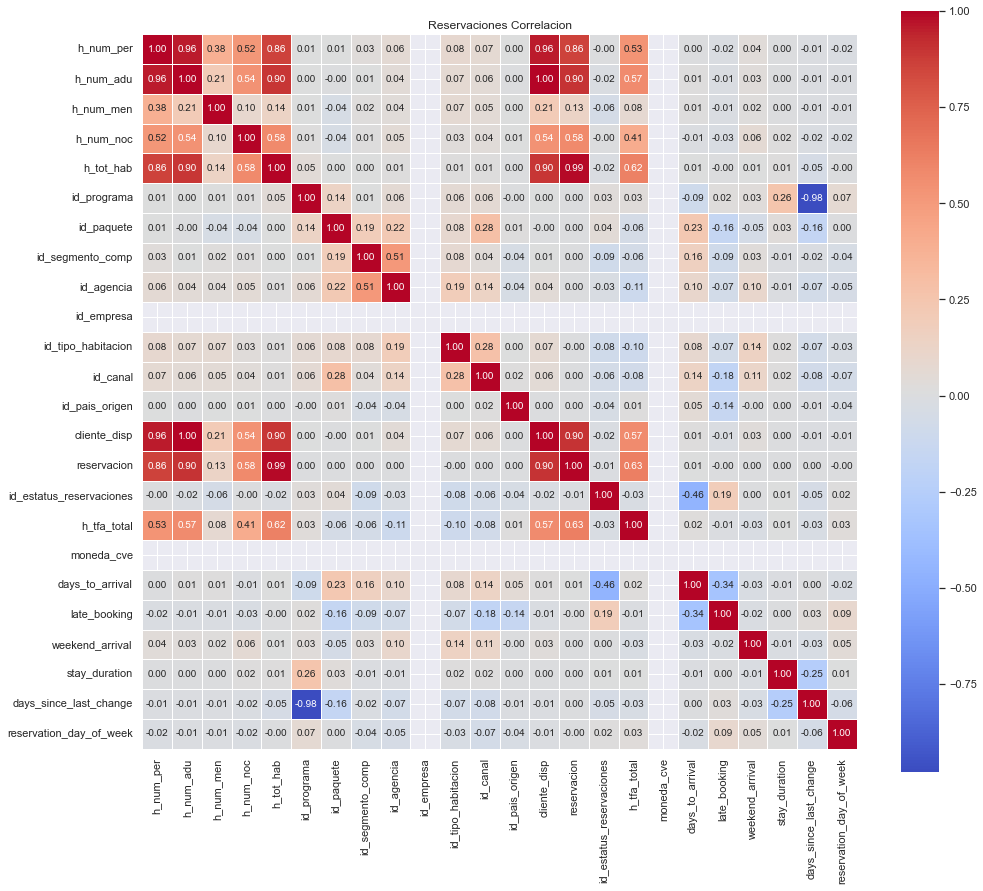

In [199]:
corr_resv = df_resv.corr(numeric_only=True)
plt.figure(figsize=(16, 14))
sns.heatmap(corr_resv, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Reservaciones Correlacion')
plt.show()

# OCUPACIONES

#### Tabla Ocupaciones

Contiene detalles sobre los cuartos ocupados en ciertas fechas en los hoteles.

In [18]:
df_ocup = pd.read_sql(f"SELECT * FROM ocupaciones", engine)

df_ocup.head()

,Fecha_hoy,ID_Entidad_Fed,ID_Agencia,ID_Tipo_Habitacion,ID_canal,ID_Programa,ID_Paquete,ing_hab,aa_ing_hab,ing_hab_nocoruso,aa_ing_hab_nocoruso,ing_hab_uso,aa_ing_hab_uso,ing_hab_cor,aa_ing_hab_cor,ing_hab_intercambios,aa_ing_hab_intercambios,cto_noc,aa_cto_noc,cto_noc_nocoruso,aa_cto_noc_nocoruso,cto_noc_uso,aa_cto_noc_uso,cto_noc_cor,aa_cto_noc_cor,ADR,aa_ADR,otr_ing,aa_otr_ing,cto_ing_res,cto_age,cto_est,ing_extras,ing_impuestos,ing_base,ing_exento,ID_empresa,ID_edificio,num_adu,aa_num_adu,num_adu_nocoruso,aa_num_adu_nocoruso,TREVPEC,aa_TREVPEC,num_men,aa_num_men,num_men_nocoruso,aa_num_men_nocoruso,num_meg,num_inf,num_jun,ID_Segmento_Mercado,ID_Segmento_Alterno,ID_Segmento_Comp,moneda_cve,ID_Empresa2
0,2021-11-15 00:00:00.000,173,305,13,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,6,17,34,2,7
1,2021-11-15 00:00:00.000,173,305,14,0,1,1,0,57,0,57,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,57,0,0,3,0,0,0,0,0,0,1,3,0,2,0,2,0,586,0,0,0,0,0,0,0,6,17,34,2,7
2,2021-11-15 00:00:00.000,173,305,14,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,6,17,34,1,7
3,2021-11-15 00:00:00.000,173,305,14,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,6,17,34,2,7
4,2021-11-15 00:00:00.000,173,305,19,3,1,1,0,774,0,774,0,0,0,0,0,0,0,5,0,5,0,0,0,0,0,154,0,0,818,0,0,0,0,0,0,1,3,0,15,0,15,0,1060,0,0,0,0,0,0,0,6,17,34,2,7


In [19]:
df_ocup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3405916 entries, 0 to 3405915
Data columns (total 56 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   Fecha_hoy                object
 1   ID_Entidad_Fed           int64 
 2   ID_Agencia               int64 
 3   ID_Tipo_Habitacion       int64 
 4   ID_canal                 int64 
 5   ID_Programa              int64 
 6   ID_Paquete               int64 
 7   ing_hab                  int64 
 8   aa_ing_hab               int64 
 9   ing_hab_nocoruso         int64 
 10  aa_ing_hab_nocoruso      int64 
 11  ing_hab_uso              int64 
 12  aa_ing_hab_uso           int64 
 13  ing_hab_cor              int64 
 14  aa_ing_hab_cor           int64 
 15  ing_hab_intercambios     int64 
 16  aa_ing_hab_intercambios  int64 
 17  cto_noc                  int64 
 18  aa_cto_noc               int64 
 19  cto_noc_nocoruso         int64 
 20  aa_cto_noc_nocoruso      int64 
 21  cto_noc_uso              int64 

## Limpieza de datos

Tabla ocupaciones

In [28]:
(df_ocup == 0).mean()

Fecha_hoy                  0.000000
ID_Entidad_Fed             0.000002
ID_Agencia                 0.000014
ID_Tipo_Habitacion         0.000000
ID_canal                   0.009431
ID_Programa                0.000007
ID_Paquete                 0.000000
ing_hab                    0.431107
aa_ing_hab                 0.708369
ing_hab_nocoruso           0.431107
aa_ing_hab_nocoruso        0.708369
ing_hab_uso                1.000000
aa_ing_hab_uso             1.000000
ing_hab_cor                1.000000
aa_ing_hab_cor             1.000000
ing_hab_intercambios       1.000000
aa_ing_hab_intercambios    1.000000
cto_noc                    0.409175
aa_cto_noc                 0.698154
cto_noc_nocoruso           0.409175
aa_cto_noc_nocoruso        0.698154
cto_noc_uso                1.000000
aa_cto_noc_uso             1.000000
cto_noc_cor                1.000000
aa_cto_noc_cor             1.000000
ADR                        0.432007
aa_ADR                     0.708834
otr_ing                    1

In [29]:
threshold_zero = 0.9

df_ocup = df_ocup.loc[:, (df_ocup == 0).mean() < threshold_zero]
df_ocup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3405916 entries, 0 to 3405915
Data columns (total 35 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   Fecha_hoy            object
 1   ID_Entidad_Fed       int64 
 2   ID_Agencia           int64 
 3   ID_Tipo_Habitacion   int64 
 4   ID_canal             int64 
 5   ID_Programa          int64 
 6   ID_Paquete           int64 
 7   ing_hab              int64 
 8   aa_ing_hab           int64 
 9   ing_hab_nocoruso     int64 
 10  aa_ing_hab_nocoruso  int64 
 11  cto_noc              int64 
 12  aa_cto_noc           int64 
 13  cto_noc_nocoruso     int64 
 14  aa_cto_noc_nocoruso  int64 
 15  ADR                  int64 
 16  aa_ADR               int64 
 17  cto_ing_res          int64 
 18  ID_empresa           int64 
 19  ID_edificio          int64 
 20  num_adu              int64 
 21  aa_num_adu           int64 
 22  num_adu_nocoruso     int64 
 23  aa_num_adu_nocoruso  int64 
 24  TREVPEC              int

In [30]:
# Replace empty strings with NaN
df_ocup = df_ocup.replace(r"^\s*$", np.nan, regex=True)

# Count NaN values after replacing empty strings
df_ocup.isnull().sum()

Fecha_hoy              0
ID_Entidad_Fed         0
ID_Agencia             0
ID_Tipo_Habitacion     0
ID_canal               0
ID_Programa            0
ID_Paquete             0
ing_hab                0
aa_ing_hab             0
ing_hab_nocoruso       0
aa_ing_hab_nocoruso    0
cto_noc                0
aa_cto_noc             0
cto_noc_nocoruso       0
aa_cto_noc_nocoruso    0
ADR                    0
aa_ADR                 0
cto_ing_res            0
ID_empresa             0
ID_edificio            0
num_adu                0
aa_num_adu             0
num_adu_nocoruso       0
aa_num_adu_nocoruso    0
TREVPEC                0
aa_TREVPEC             0
num_men                0
aa_num_men             0
num_men_nocoruso       0
aa_num_men_nocoruso    0
ID_Segmento_Mercado    0
ID_Segmento_Alterno    0
ID_Segmento_Comp       0
moneda_cve             0
ID_Empresa2            0
dtype: int64

## Manejar columnas repetitivas o que no nos sirven

Diferentes columnas contienen la fecha u hora, así como repiten datos.

In [35]:
df_ocup = df_ocup.drop(columns=['ing_hab_nocoruso','aa_ing_hab_nocoruso','cto_noc_nocoruso','aa_cto_noc_nocoruso','aa_num_adu',
                               'num_adu_nocoruso','aa_num_adu_nocoruso','num_men','aa_num_men','num_men_nocoruso','aa_num_men_nocoruso'])

df_ocup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3405916 entries, 0 to 3405915
Data columns (total 24 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   Fecha_hoy            object
 1   ID_Entidad_Fed       int64 
 2   ID_Agencia           int64 
 3   ID_Tipo_Habitacion   int64 
 4   ID_canal             int64 
 5   ID_Programa          int64 
 6   ID_Paquete           int64 
 7   ing_hab              int64 
 8   aa_ing_hab           int64 
 9   cto_noc              int64 
 10  aa_cto_noc           int64 
 11  ADR                  int64 
 12  aa_ADR               int64 
 13  cto_ing_res          int64 
 14  ID_empresa           int64 
 15  ID_edificio          int64 
 16  num_adu              int64 
 17  TREVPEC              int64 
 18  aa_TREVPEC           int64 
 19  ID_Segmento_Mercado  int64 
 20  ID_Segmento_Alterno  int64 
 21  ID_Segmento_Comp     int64 
 22  moneda_cve           int64 
 23  ID_Empresa2          int64 
dtypes: int64(23), object(1)


## Descripción

In [39]:
df_ocup.describe()

,ID_Entidad_Fed,ID_Agencia,ID_Tipo_Habitacion,ID_canal,ID_Programa,ID_Paquete,ing_hab,aa_ing_hab,cto_noc,aa_cto_noc,ADR,aa_ADR,cto_ing_res,ID_empresa,ID_edificio,num_adu,TREVPEC,aa_TREVPEC,ID_Segmento_Mercado,ID_Segmento_Alterno,ID_Segmento_Comp,moneda_cve,ID_Empresa2
count,3.405916e+06,3.405916e+06,3.405916e+06,3.405916e+06,3.405916e+06,3.405916e+06,3.405916e+06,3.405916e+06,3.405916e+06,3.405916e+06,3.405916e+06,3.405916e+06,3.405916e+06,3.405916e+06,3.405916e+06,3.405916e+06,3.405916e+06,3.405916e+06,3.405916e+06,3.405916e+06,3.405916e+06,3405916.0,3.405916e+06
mean,1.744440e+02,3.535298e+02,2.865121e+01,8.069181e+00,9.999982e-01,1.001284e+00,1.381568e+03,6.897480e+02,1.043373e+00,5.076074e-01,8.277631e+02,4.329522e+02,6.372470e+02,2.179304e+00,1.469965e+00,2.129918e+00,8.077207e+02,4.222930e+02,4.540532e+00,2.213352e+01,2.436546e+01,1.5,3.611554e+00
std,1.037370e+02,2.998041e+02,1.539454e+01,1.265095e+01,3.511621e-03,3.664794e-02,5.105243e+03,3.084665e+03,2.252492e+00,1.458628e+00,1.564314e+03,1.190448e+03,3.164017e+03,1.526284e+00,1.309231e+00,4.697573e+00,1.016015e+03,8.229809e+02,1.875121e+00,1.151724e+01,1.218445e+01,0.5,2.343840e+00
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.432950e+05,-1.432950e+05,-1.000000e+00,-1.000000e+00,-7.043200e+04,-7.043200e+04,-1.516240e+05,1.000000e+00,0.000000e+00,-6.000000e+00,-2.307200e+04,-2.307200e+04,1.000000e+00,0.000000e+00,0.000000e+00,1.0,1.000000e+00
25%,6.300000e+01,1.230000e+02,1.700000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,1.700000e+01,1.200000e+01,1.0,2.000000e+00
50%,1.730000e+02,2.140000e+02,3.000000e+01,2.000000e+00,1.000000e+00,1.000000e+00,1.020000e+02,0.000000e+00,1.000000e+00,0.000000e+00,8.900000e+01,0.000000e+00,4.100000e+01,2.000000e+00,2.000000e+00,2.000000e+00,8.090000e+02,0.000000e+00,6.000000e+00,1.700000e+01,3.200000e+01,1.5,2.000000e+00
75%,2.530000e+02,7.710000e+02,3.600000e+01,4.000000e+00,1.000000e+00,1.000000e+00,1.698000e+03,1.090000e+02,1.000000e+00,1.000000e+00,1.555000e+03,1.000000e+02,1.940000e+02,2.000000e+00,3.000000e+00,2.000000e+00,1.237000e+03,8.540000e+02,6.000000e+00,2.500000e+01,3.400000e+01,2.0,6.000000e+00
max,3.770000e+02,1.052000e+03,6.600000e+01,5.500000e+01,2.000000e+00,3.000000e+00,9.926740e+05,6.251430e+05,2.050000e+02,8.200000e+01,1.056040e+05,1.056040e+05,4.806620e+05,6.000000e+00,4.000000e+00,4.100000e+02,1.037330e+05,5.280200e+04,7.000000e+00,4.900000e+01,4.900000e+01,2.0,7.000000e+00


In [61]:
df_ocup['TREVPEC'].describe()

count    3.405916e+06
mean     8.077207e+02
std      1.016015e+03
min     -2.307200e+04
25%      0.000000e+00
50%      8.090000e+02
75%      1.237000e+03
max      1.037330e+05
Name: TREVPEC, dtype: float64

In [76]:
import pandas as pd

# Calcular el percentil 75 de TREVPEC
threshold_trevpec = df_ocupaciones['TREVPEC'].quantile(0.75)

# Crear la columna target_TREVPEC (1 = Alto valor, 0 = Bajo valor)
df_ocupaciones['target_TREVPEC'] = (df_ocupaciones['TREVPEC'] > threshold_trevpec).astype(int)

# Verificar la distribución de la variable objetivo
print(df_ocupaciones['target_TREVPEC'].value_counts())

target_TREVPEC
0    2365834
1     786896
Name: count, dtype: int64


In [77]:
# Seleccionar características relevantes
features = ['ing_hab', 'cto_noc', 'ADR', 'ID_Segmento_Mercado', 'ID_Segmento_Alterno', 'ID_Segmento_Comp', 'num_adu']
X = df_ocupaciones[features]

# Variable objetivo
y = df_ocupaciones['target_TREVPEC']



from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Definir variables categóricas y numéricas
categorical_features = ['ID_Segmento_Mercado', 'ID_Segmento_Alterno', 'ID_Segmento_Comp']
numeric_features = ['ing_hab', 'ADR', 'num_adu', 'cto_noc']

# Pipeline para preprocesar
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Preprocesar los datos
X_preprocessed = preprocessor.fit_transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42, stratify=y)

print("Tamaño de los datos de entrenamiento:", X_train.shape)
print("Tamaño de los datos de prueba:", X_test.shape)






Tamaño de los datos de entrenamiento: (2522184, 106)
Tamaño de los datos de prueba: (630546, 106)


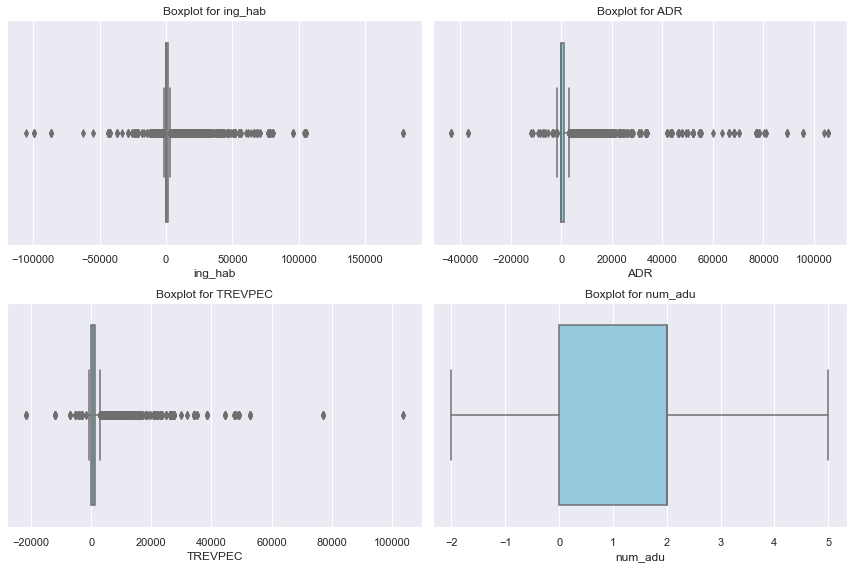

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selected features
selected_features = ['ing_hab', 'ADR', 'TREVPEC', 'num_adu']

# Plot boxplots for each feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 2, i + 1)  # Adjust grid size if more features are added
    sns.boxplot(x=df_ocupaciones[feature], color='skyblue')
    plt.title(f'Boxplot for {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()


In [75]:
# Function to calculate IQR and filter outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter rows within the bounds
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    print(f'{column}: Removed {len(df) - len(df_filtered)} outliers')
    return df_filtered

# Apply to selected features
for feature in selected_features:
    df_ocupaciones = remove_outliers(df_ocup, feature)


ing_hab: Removed 287508 outliers
ADR: Removed 145402 outliers
TREVPEC: Removed 88970 outliers
num_adu: Removed 253186 outliers


In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Entrenar modelo
model = RandomForestClassifier(random_state=42,  n_estimators=100, max_depth=10,max_features='sqrt',verbose=1)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  2.3min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.2s


Accuracy: 0.9697658854389688
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    473167
           1       0.96      0.92      0.94    157379

    accuracy                           0.97    630546
   macro avg       0.97      0.95      0.96    630546
weighted avg       0.97      0.97      0.97    630546



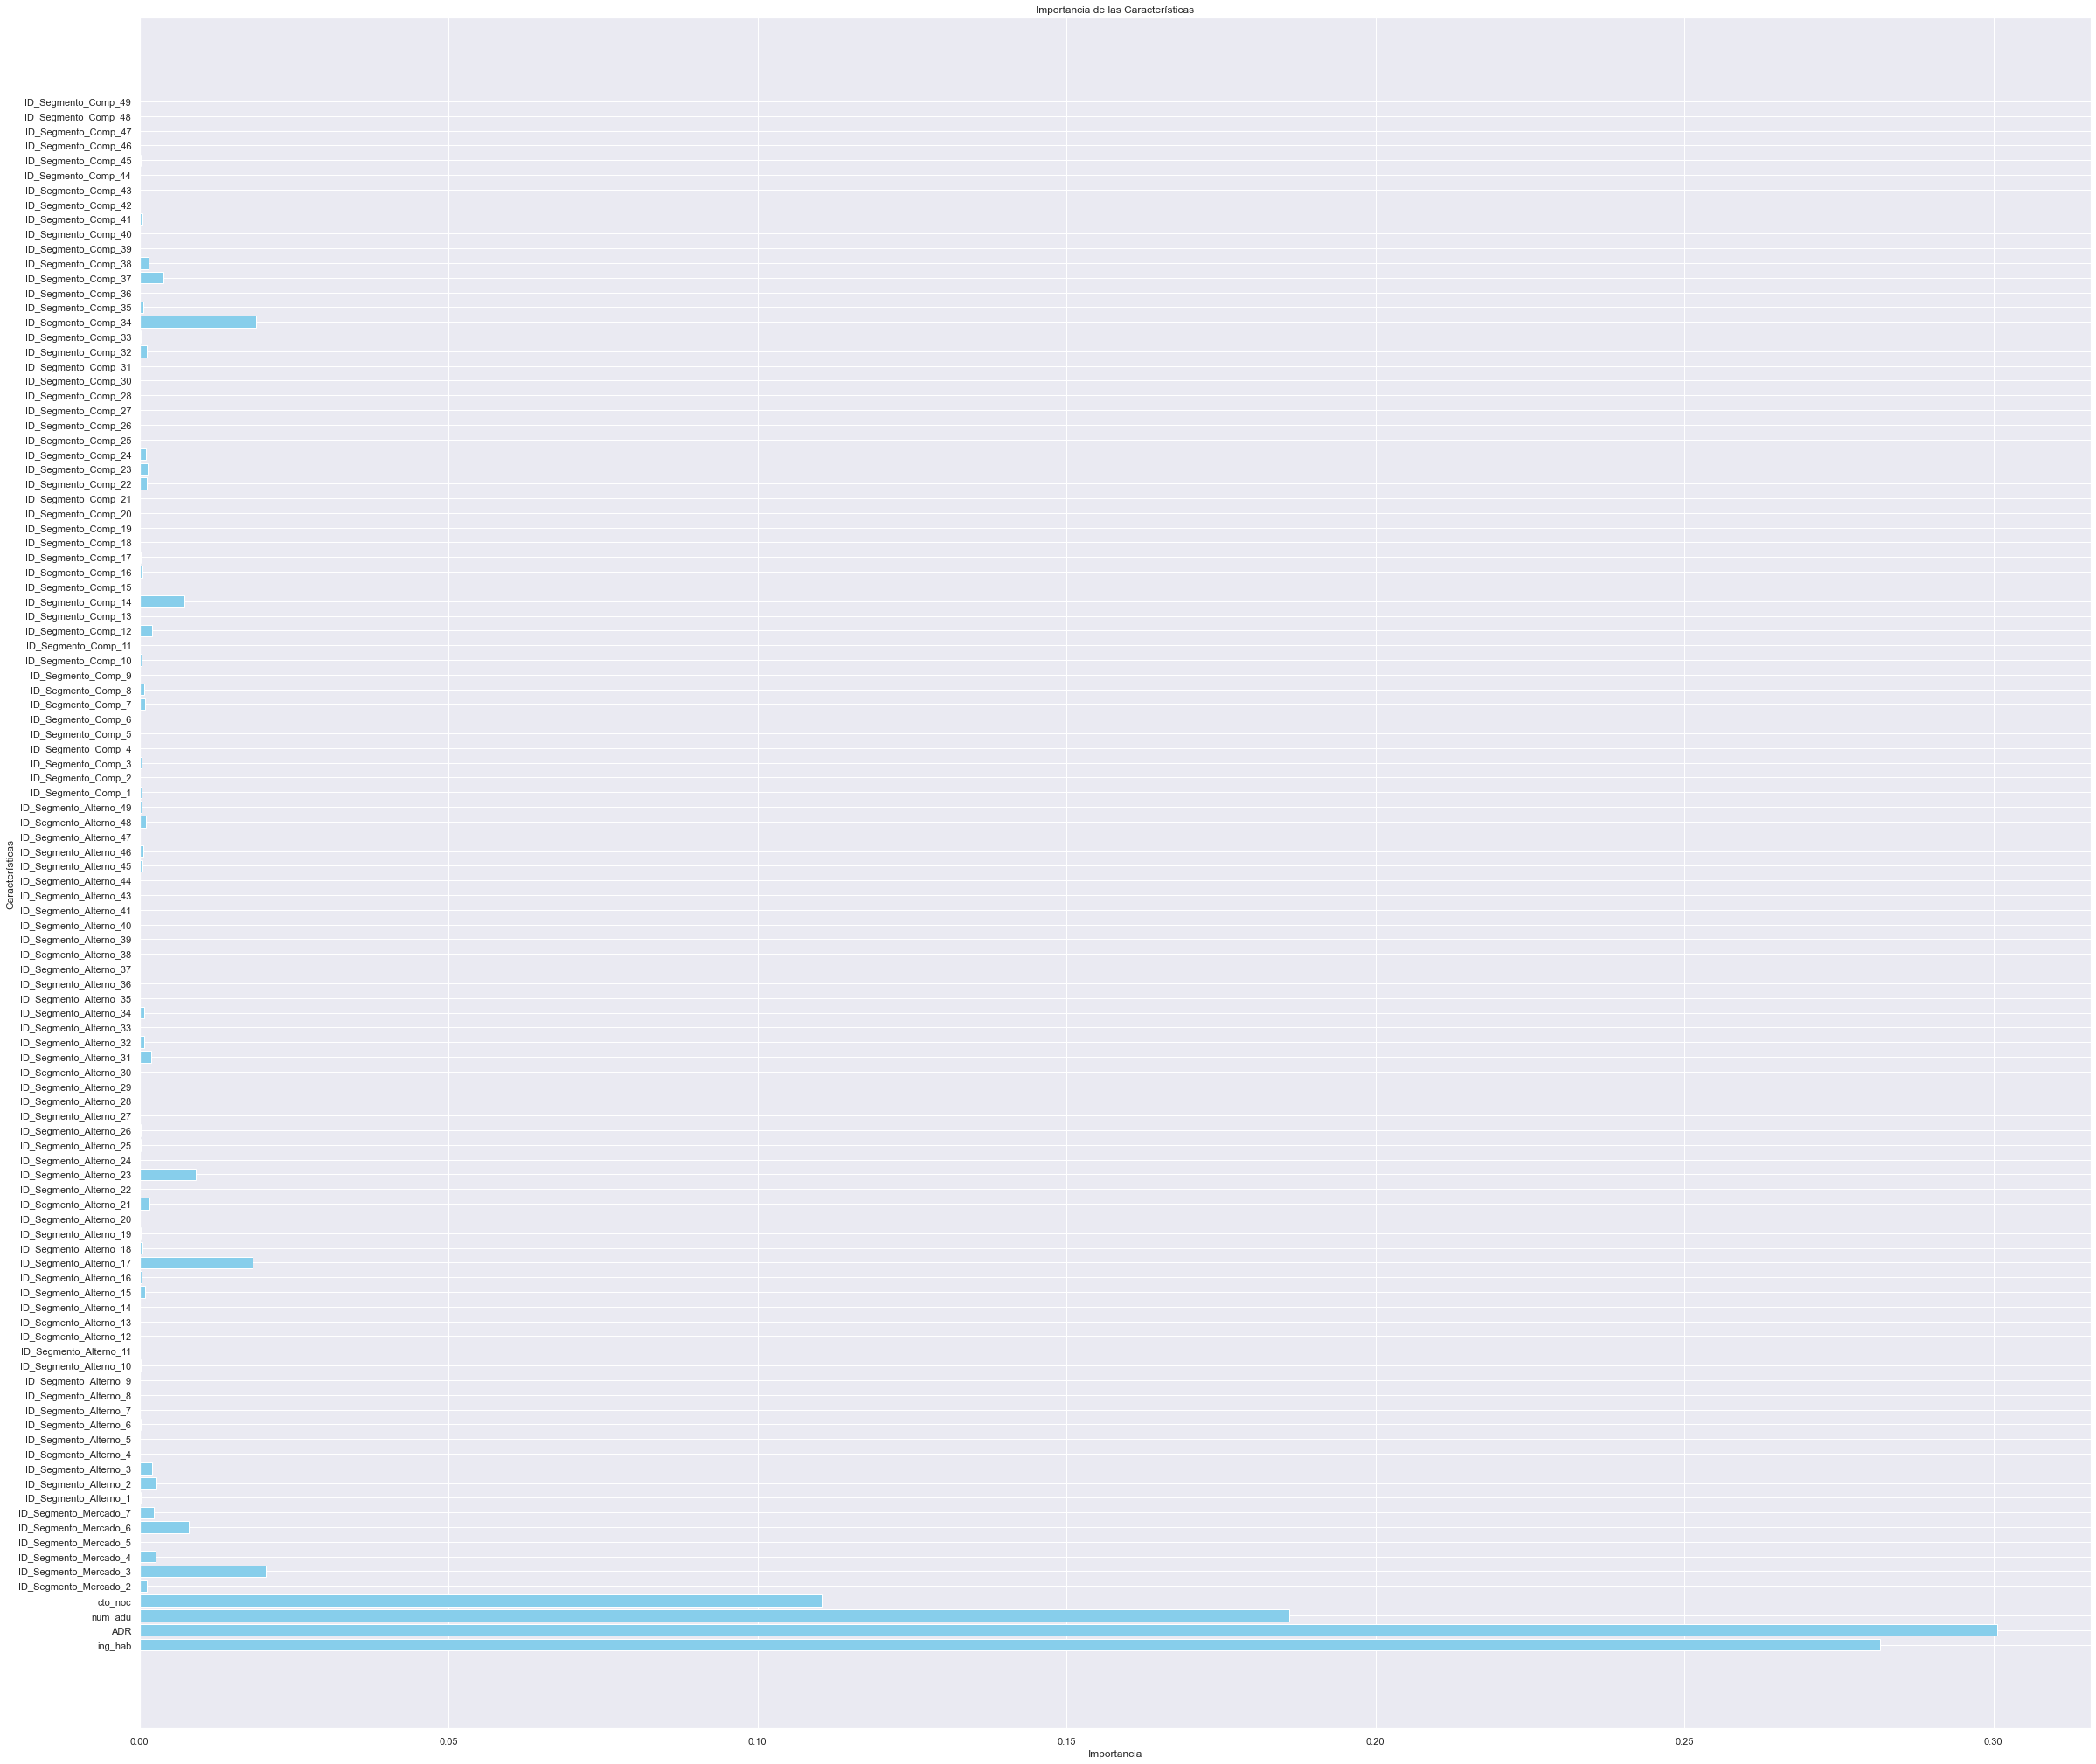

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener importancias de características
feature_names = numeric_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out())
importances = model.feature_importances_

# Crear gráfico
plt.figure(figsize=(40, 36))
plt.barh(feature_names, importances, color='skyblue')
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener importancias de características
feature_names = numeric_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out())
importances = model.feature_importances_

# Crear gráfico
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

In [49]:
df_ocup['ID_Segmento_Comp'].unique()

array([34, 12, 37, 14, 16,  3, 33, 43, 45, 41, 38, 26, 23, 48, 42, 36,  7,
        8,  9,  2, 24,  1, 32, 10, 46, 22,  4, 35, 18, 13, 17, 15,  5, 47,
       21, 49, 20, 40, 31, 25, 19, 44, 11, 27, 39,  6, 28, 30,  0],
      dtype=int64)

In [50]:
import pandas as pd

# Contar las frecuencias de cada ID en las columnas
freq_segmento_mercado = df_ocup['ID_Segmento_Mercado'].value_counts()
freq_segmento_alterno = df_ocup['ID_Segmento_Alterno'].value_counts()
freq_segmento_comp = df_ocup['ID_Segmento_Comp'].value_counts()

# Mostrar las frecuencias
print("Frecuencia de ID_Segmento_Mercado:")
print(freq_segmento_mercado)

print("\nFrecuencia de ID_Segmento_Alterno:")
print(freq_segmento_alterno)

print("\nFrecuencia de ID_Segmento_Comp:")
print(freq_segmento_comp)


Frecuencia de ID_Segmento_Mercado:
ID_Segmento_Mercado
6    1437768
3     966214
7     373662
2     360848
1     159546
4      96844
5      11034
Name: count, dtype: int64

Frecuencia de ID_Segmento_Alterno:
ID_Segmento_Alterno
17    1137912
21     363700
45     323112
23     304788
15     266956
25     117824
31     116868
34      96578
7       84574
2       70644
48      66430
1       58386
6       52596
3       44708
10      37662
32      36174
49      30414
27      27978
18      22594
47      19528
46      18208
22      17776
36      11992
11      10548
35      10456
16      10306
12       8726
19       7018
39       6802
24       4438
33       3372
26       3148
13       3028
30       2208
43       2104
38       1916
8        1806
37        968
14        498
29        352
9         256
5         180
44        128
20         72
40         52
4          50
28         44
41         32
0           6
Name: count, dtype: int64

Frecuencia de ID_Segmento_Comp:
ID_Segmento_Comp
34    1137

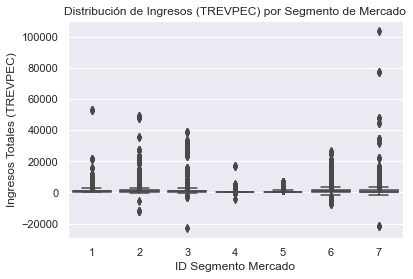

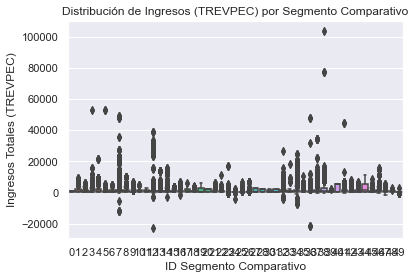

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Segmento Mercado vs. TREVPEC
sns.boxplot(data=df_ocup, x='ID_Segmento_Mercado', y='TREVPEC')
plt.title('Distribución de Ingresos (TREVPEC) por Segmento de Mercado')
plt.xlabel('ID Segmento Mercado')
plt.ylabel('Ingresos Totales (TREVPEC)')
plt.show()

# Segmento Comparativo vs. TREVPEC
sns.boxplot(data=df_ocup, x='ID_Segmento_Comp', y='TREVPEC')
plt.title('Distribución de Ingresos (TREVPEC) por Segmento Comparativo')
plt.xlabel('ID Segmento Comparativo')
plt.ylabel('Ingresos Totales (TREVPEC)')
plt.show()

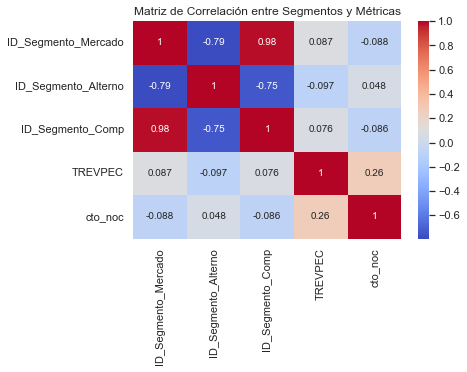

In [52]:
# Selección de columnas
segment_columns = ['ID_Segmento_Mercado', 'ID_Segmento_Alterno', 'ID_Segmento_Comp', 'TREVPEC', 'cto_noc']

# Calcular matriz de correlación
correlation_matrix = df_ocup[segment_columns].corr()

# Visualizar la correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Segmentos y Métricas')
plt.show()


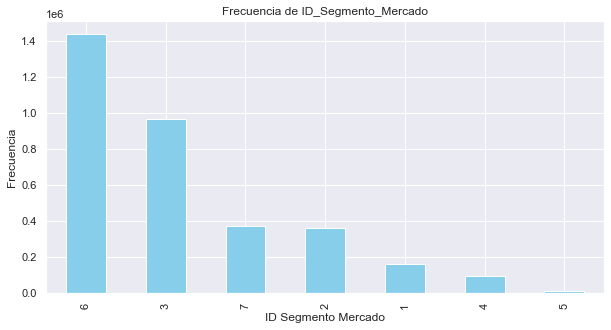

In [54]:
# Comparar frecuencias de segmentos
df_ocup['ID_Segmento_Mercado'].value_counts().plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Frecuencia de ID_Segmento_Mercado')
plt.xlabel('ID Segmento Mercado')
plt.ylabel('Frecuencia')
plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # For binary classification
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=32)


## Correlation map

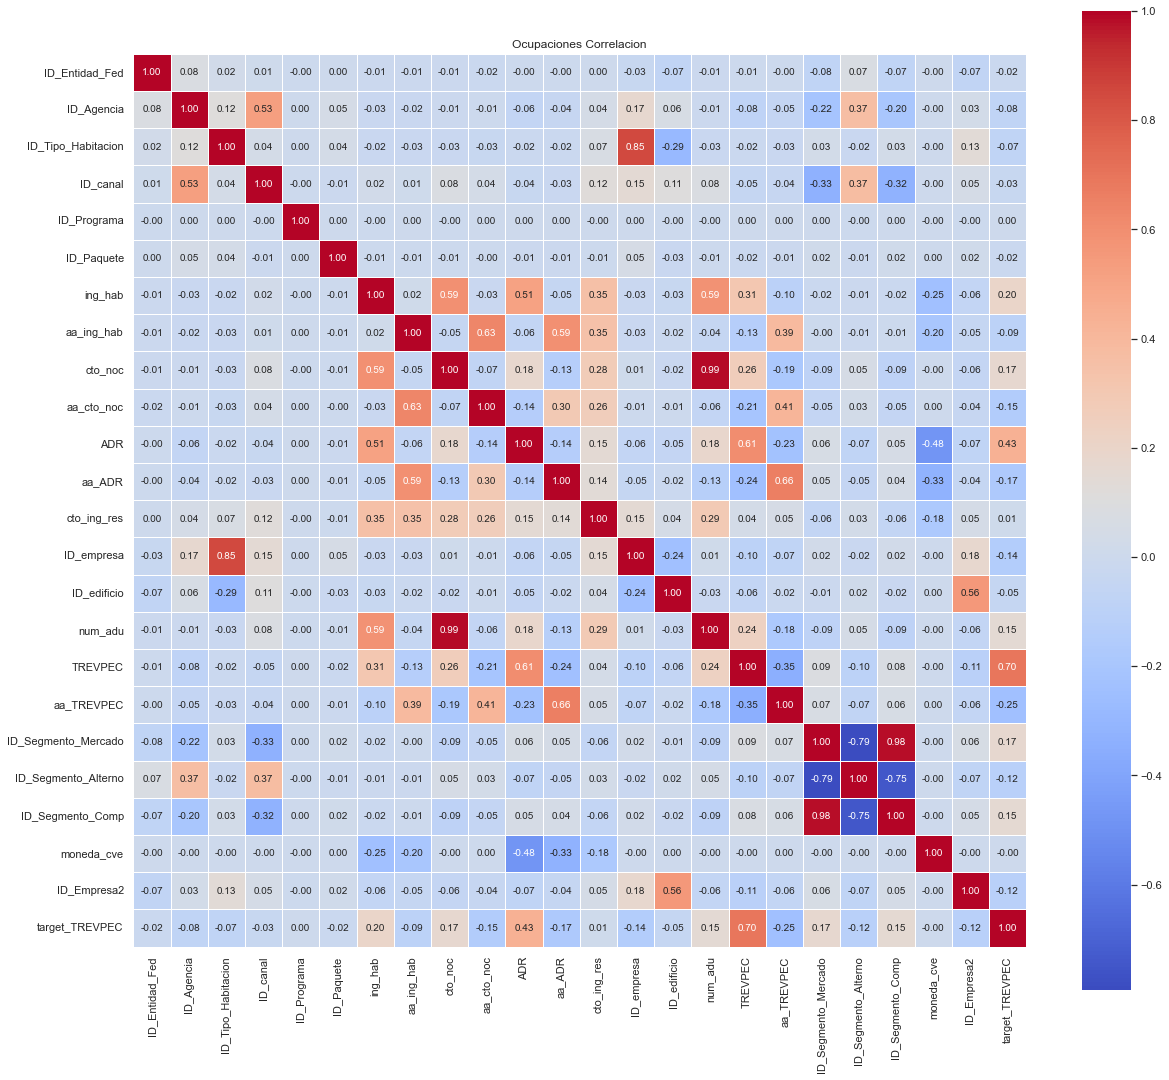

In [63]:
corr_ocup = df_ocup.corr(numeric_only=True)
plt.figure(figsize=(20, 18))
sns.heatmap(corr_ocup, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Ocupaciones Correlacion')
plt.show()

## Graficas descriptivas

Para entender de mejor manera los comportamientos de los datos se crearon diferentes gráficas descriptivas con información que nos ayuda a comprenderlos.

### Ingresos por día en tabla Detalles Ventas

In [ ]:
# Agrupar total de importe por día
total_per_day = {
    'lunes': (df_dv['lunes'] * df_dv['importe']).sum(),
    'martes': (df_dv['martes'] * df_dv['importe']).sum(),
    'miercoles': (df_dv['miercoles'] * df_dv['importe']).sum(),
    'jueves': (df_dv['jueves'] * df_dv['importe']).sum(),
    'viernes': (df_dv['viernes'] * df_dv['importe']).sum(),
    'sabado': (df_dv['sabado'] * df_dv['importe']).sum(),
    'domingo': (df_dv['domingo'] * df_dv['importe']).sum(),
}

total_per_day_df = pd.DataFrame(list(total_per_day.items()), columns=['Dia', 'Importe'])

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(total_per_day_df['Dia'], total_per_day_df['Importe'], color='skyblue')
plt.title('Ingresos por día - Detalles Ventas')
plt.xlabel('Dia de la semana')
plt.ylabel('Importe ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Ingresos por hotel en tabla Detalles Ventas

In [ ]:

total_revenue_per_hotel = df_dv.groupby('id_empresa')['importe'].sum().reset_index()
total_revenue_per_hotel.columns = ['id_empresa', 'importe']

plt.figure(figsize=(10, 6))
plt.bar(total_revenue_per_hotel['id_empresa'], total_revenue_per_hotel['importe'], color='skyblue')
plt.title('Importe por hotel')
plt.xlabel('Hotel ID')
plt.ylabel('Importe ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

### Ingresos por caja en tabla Cubiertos

In [ ]:

total_por_caja = df_cub.groupby('ID_Caja')['Ingresos'].sum().reset_index()

total_por_caja.columns = ['ID_Caja', 'Ingresos']

plt.figure(figsize=(10, 6))
plt.bar(total_por_caja['ID_Caja'], total_por_caja['Ingresos'], color='skyblue')
plt.title('Ingresos por caja')
plt.xlabel('Clave de caja')
plt.ylabel('Ingresos ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')


plt.tight_layout()
plt.show()

### Distribución de Ocupaciones por tipo de habitación

In [ ]:

ocupacion_tipo_hab = df_ocup.groupby("ID_Tipo_Habitacion")["ing_hab"].sum()
plt.figure(figsize=(22, 18))
ocupacion_tipo_hab.plot(kind="bar", color="skyblue")
plt.title("Distribución de Ocupación por Tipo de Habitación")
plt.xlabel("Tipo de Habitación")
plt.ylabel("Ocupación Total (Ingresos)")
plt.xticks(rotation=45)
plt.show()


### Ocupación de habitaciones y ADR promedio a través del tiempo

In [ ]:
# Convertir fechas y agregar columna de mes
df_ocup["Fecha_hoy"] = pd.to_datetime(df_ocup["Fecha_hoy"])
df_ocup["Mes"] = df_ocup["Fecha_hoy"].dt.to_period("M")

# Agrupar por mes y calcular la media de ocupación y ADR
ocupacion_mes = df_ocup.groupby("Mes")["ing_hab"].mean()
adr_mes = df_ocup.groupby("Mes")["ADR"].mean()

# Graficar
plt.figure(figsize=(10, 5))
ocupacion_mes.plot(label="Ocupación Media", color="skyblue")
adr_mes.plot(label="ADR Media", color="salmon")
plt.title("Ocupación y ADR Media por Mes")
plt.xlabel("Mes")
plt.ylabel("Valor")
plt.legend()
plt.show()


### Ingresos por Canal de Reservación de tabla Ocupaciones

In [ ]:

ingresos_por_canal = df_ocup.groupby("ID_canal")["ing_hab"].sum()
plt.figure(figsize=(22, 18))
ingresos_por_canal.plot(kind="bar", color="lightcoral")
plt.title("Ingresos por Canal de Reservación")
plt.xlabel("Canal")
plt.ylabel("Ingresos Totales")
plt.xticks(rotation=45)
plt.show()


### Ingresos por Segmento de Mercado de tabla Reservaciones

In [ ]:

ingresos_segmento = df_resv.groupby("id_segmento_comp")["h_tfa_total"].sum()
plt.figure(figsize=(22, 18))
ingresos_segmento.plot(kind="bar", color="gold")
plt.title("Ingreso Total por Segmento de Mercado")
plt.xlabel("Segmento de Mercado")
plt.ylabel("Ingresos Totales")
plt.xticks(rotation=45)
plt.show()


## Outliers Numero de Noches de Estancia

Averiguar las noches de estancia promedio sin outliers

In [ ]:
# Boxplot de la duración de la estancia (h_num_noc)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_resv["h_num_noc"], color="skyblue")
plt.title("Distribución de la Duración de Estancia (Noches)")
plt.xlabel("Número de Noches (h_num_noc)")
plt.show()

In [ ]:
# Calcular los cuartiles y el IQR
Q1 = df_resv["h_num_noc"].quantile(0.25)
Q3 = df_resv["h_num_noc"].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los valores que están dentro de los límites
df_resv_filtered = df_resv[(df_resv["h_num_noc"] >= lower_bound) & (df_resv["h_num_noc"] <= upper_bound)]

# Graficar el boxplot sin outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_resv_filtered["h_num_noc"], color="skyblue")
plt.title("Distribución de la Duración de Estancia (Noches) - Sin Outliers")
plt.xlabel("Número de Noches (h_num_noc)")
plt.show()
